# P3 Concevez une application au service de la santé publique 

L'agence <span style='color:blue'> <a href = "http://www.santepubliquefrance.fr/">"*Santé publique France*" </a></span> a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. <br>
Vous souhaitez y participer et proposer une idée d’application.

Le jeu de données <font color='orange'>Open Food Facts</font> est disponible sur le <a href = "https://world.openfoodfacts.org/">site officiel</a> (ou disponible à <a href ="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip">ce lien</a> en téléchargement).
<br>
Les variables sont définies à <a href = "https://world.openfoodfacts.org/data/data-fields.txt">cette adresse</a>

Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import os

import missingno as msno

Erreur: pandas lors de l'import, certaines colonnes possèdent des valeurs de types differents:

Correction parametrer  l'argument low_memory à False

In [2]:
%%time
if os.path.exists("fr.openfoodfacts.org.products.csv"):
    openfoodfacts = pd.read_csv("fr.openfoodfacts.org.products.csv",sep='\t',low_memory=False)

CPU times: total: 13.2 s
Wall time: 13.3 s


prendre 1 echant en parametre / 
figer typ de chaq col

Le code cidessous permet de créer un rapport automatisé de notre dataframe.

%%time
from pandas_profiling import ProfileReport
profile = ProfileReport(openfoodfacts.sample(int(round(openfoodfacts.shape[0]*0.01,ndigits=0))), title="Pandas Profiling Report")
profile.to_file("output.html")

In [3]:
openfoodfacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Le fichier comtient 106 variables numeriques et 56 varriables catégoriques

In [4]:
nbLigne, nbCol = openfoodfacts.shape
nbLigne, nbCol

(320772, 162)

### Etude du nombre de valeurs manquantes

In [5]:
nbNaVariable = pd.DataFrame(openfoodfacts.isnull().sum().sort_values(),columns = ["Nombre NA"])

In [6]:
nbNaVariable.head(10)

,Nombre NA
last_modified_t,0
last_modified_datetime,0
creator,2
created_t,3
created_datetime,9
code,23
url,23
states,46
states_tags,46
states_fr,46


On voit que 23 produits ne possède pas de code bar. Que sont ces produits?

In [7]:
openfoodfacts[openfoodfacts.code.isnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Dia,Sogeres",France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France, en:switzerland","en:belgium,en:france,en:switzerland","Belgique,France,Suisse","Lait entier 69.5 %, fruits : fraise 10 %, mang...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,NaN,villecomtal-sur-arros-gers-france,"Veynes,France",SuperU,France,en:france,France,"_Lait_ entier (78%), fruits : mangue, abricot...",Lait,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,NaN,villecomtal-sur-arros-gers-france,"Torcy 77,France",Carrefour,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,France,en:france,France,"_Lait_ écrémé, fruits : fraise (12 %), cerise ...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,NaN,villecomtal-sur-arros-gers-france,"Saint-Priest,France",Auchan,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, ananas (8 %), sucre (7,1 %), _l...","Lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce sont des produits laitiers. Peut etre qu'il faut les supprimer.

In [8]:
openfoodfacts = openfoodfacts.loc[~openfoodfacts.code.isna()]

In [9]:
nbLigne, nbCol = openfoodfacts.shape
nbNaVariable = pd.DataFrame(openfoodfacts.isnull().sum().sort_values(),columns = ["Nombre NA"])
nbLigne, nbCol

(320749, 162)

### Etudes des Doublons

In [10]:
openfoodfacts.duplicated().sum()

0

In [11]:
openfoodfacts.code.nunique()/openfoodfacts.shape[0]

1.0

On ne trouve pas de valeurs manquantes.
Il y a-t'il des erreurs?

In [12]:
openfoodfacts.code.str.replace('[a-zA-Z]','A',regex=True).str.replace('[0-9]','N',regex=True).value_counts()

NNNNNNNNNNNNN                                302985
NNNNNNNN                                      13851
NNNNNNNNNNN                                    2322
NNNNNNNNNNNN                                    825
NNNNNNNNNNNNNN                                  253
NNNNNNNNNN                                      136
NNNNNNN                                          96
NNNNNN                                           67
NNNN                                             34
NNNNNNNNNNNNNNN                                  31
NNNNNNNNNNNNNNNNNNNNNNNN                         31
NNNNN                                            20
NNNNNNNNNNNNNNNNNN                               20
NNNNNNNNN                                        18
NNNNNNNNNNNNNNNN                                 13
NNN                                               8
NNNNNNNNNNNNNNNNNNNNNN                            7
NN                                                7
NNNNNNNNNNNNNNNNNNNNNNNNNN                        5
N           

In [13]:
openfoodfacts.code.str.replace('[a-zA-Z]','A',regex=True).str.zfill(41).str.replace('[0-9]','N',regex=True).value_counts()

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN    320749
Name: code, dtype: int64

In [14]:
openfoodfacts[openfoodfacts.code.str.zfill(41)=='00000000000000000000000000000000000016117'][['url']].iloc[1].values

array(['http://world-fr.openfoodfacts.org/produit/00016117/colossal-olives-with-jalapeno-peppers-trader-joe-s'],
      dtype=object)

</br>

</br>

# Etude des types de variables

In [15]:
pd.options.display.max_rows,pd.options.display.max_columns

(60, 20)

In [16]:
pd.set_option("display.max_rows", 60) #parametre le nombre de ligne affichable dans dataframe pandas
pd.set_option("expand_frame_repr", True) #permet de deplier les colonnes cachées
pd.set_option("display.max_columns",200 ) #permet d'afficher jusqu'à 200 colonnes dans une cellule

In [17]:
openfoodfacts.sample(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
224889,3326120003255,http://world-fr.openfoodfacts.org/produit/3326...,openfoodfacts-contributors,1490475447,2017-03-25T20:57:27Z,1490475590,2017-03-25T20:59:50Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:CH,en:switzerland,Suisse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117610,0607880040951,http://world-fr.openfoodfacts.org/produit/0607...,usda-ndb-import,1489091355,2017-03-09T20:29:15Z,1489091355,2017-03-09T20:29:15Z,"Neapolitan Ice Cream, Vanilla, Chocolate & Str...",NaN,NaN,NaN,NaN,"Southern Home, Bruno's Supermarkets Inc.","southern-home,bruno-s-supermarkets-inc",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Skim milk, cream, sugar, corn syrup, whey, s

In [18]:
nomColonnes = pd.DataFrame({'Colonnes':openfoodfacts.columns})
nomColonnes.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
Colonnes,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


In [19]:
# Categoriser les types de colonnes
#info general
general_information = nomColonnes.Colonnes[:10].values.tolist()

#tags
tags = nomColonnes.Colonnes[10:21].values.tolist() + nomColonnes.Colonnes[24:34].values.tolist()

#les ingredients
ingredients = nomColonnes.Colonnes[34:40].values.tolist()

#
misc_data = nomColonnes.Colonnes[40:52].values.tolist() + nomColonnes.Colonnes[54:63].values.tolist()

#Les vvaleurs nutritionnelles
nutrition_facts = nomColonnes.Colonnes[63:157].values.tolist() + nomColonnes.Colonnes[160:162].values.tolist()


#Les scores nutritionnelles
score_foot_print = nomColonnes.Colonnes[52:54].values.tolist() + nomColonnes.Colonnes[157:160].values.tolist()

labels = nomColonnes.Colonnes[21:24].values.tolist()

#Remplir colonnes type_de_données
nomColonnes['type_de_colonne'] = ''

nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(general_information)] = "general_information"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(tags)] = "tags"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(ingredients)] = "ingredients"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(misc_data)] = "misc_data"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(nutrition_facts)] = "nutrition_facts"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(score_foot_print)] = "score_foot_print"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(labels)] = "labels"

In [20]:
nomColonnes.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
Colonnes,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
type_de_colonne,general_information,general_information,general_information,general_information,general_information,general_information,general_information,general_information,general_information,general_information,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,labels,labels,labels,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,ingredients,ingredients,ingredients,ingredients,ingredients,ingredients,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,score_foot_print,score_foot_print,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutritio

In [21]:
nomColonnes = nomColonnes.merge(right=nbNaVariable.reset_index(),left_on='Colonnes',right_on='index',how='left').drop(columns=['index'])

</br>

</br>

</br>

</br>

## Supprimer les colonnes en double

In [22]:
col_to_drop = []
colgarder = []

### les valeurs manquantes

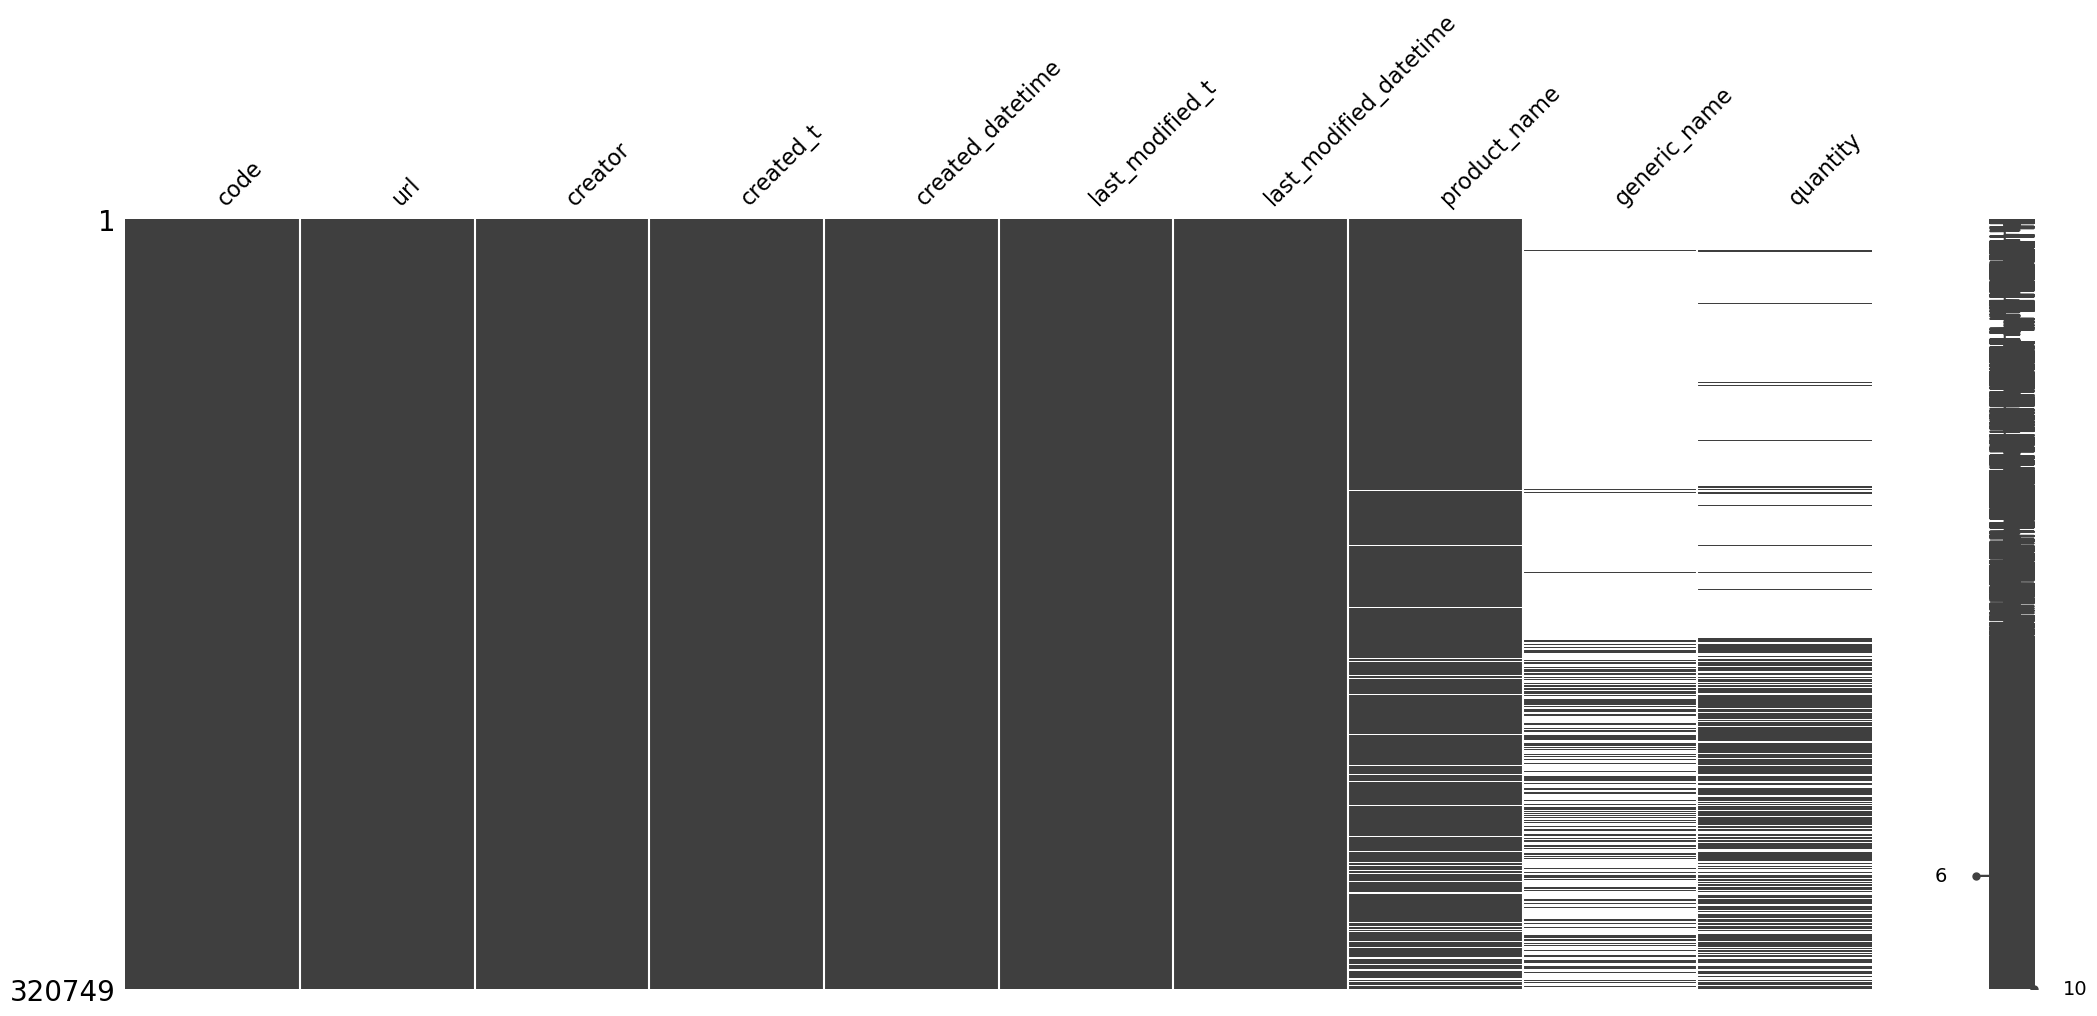

In [23]:
# les variables general_information
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(general_information)]]);

In [24]:
openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(general_information)]].isna().sum()/nbLigne

code                      0.000000
url                       0.000000
creator                   0.000006
created_t                 0.000000
created_datetime          0.000003
last_modified_t           0.000000
last_modified_datetime    0.000000
product_name              0.055377
generic_name              0.835469
quantity                  0.673265
dtype: float64

#### Creation de la variable url_page_name 
> Idée: Completer la variable categorie ou product name

In [25]:
openfoodfacts.url.unique()

array(['http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao',
       'http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole',
       'http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser',
       ...,
       'http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7',
       'http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr',
       'http://world-fr.openfoodfacts.org/produit/999990026839/sugar-free-drink-mix-peach-tea-market-pantry'],
      dtype=object)

In [26]:
openfoodfacts.url.str.replace('^http://world-fr.openfoodfacts.org/produit/[0-9]+/','',regex=True).unique()

array(['farine-de-ble-noir-ferme-t-y-r-nao',
       'banana-chips-sweetened-whole', 'peanuts-torn-glasser', ...,
       'mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s',
       '%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7',
       'sugar-free-drink-mix-peach-tea-market-pantry'], dtype=object)

#### Completer na colonne product name
> si le product name est na prendre url_name

</br>

</br>

</br>

In [27]:
# general_information
col_to_drop += ['generic_name','url','creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']
colgarder += ['code','product_name','quantity']

#Maj general_information
[general_information.remove(x) for x in col_to_drop]
general_information

['code', 'product_name', 'quantity']

</br>

</br>

</br>

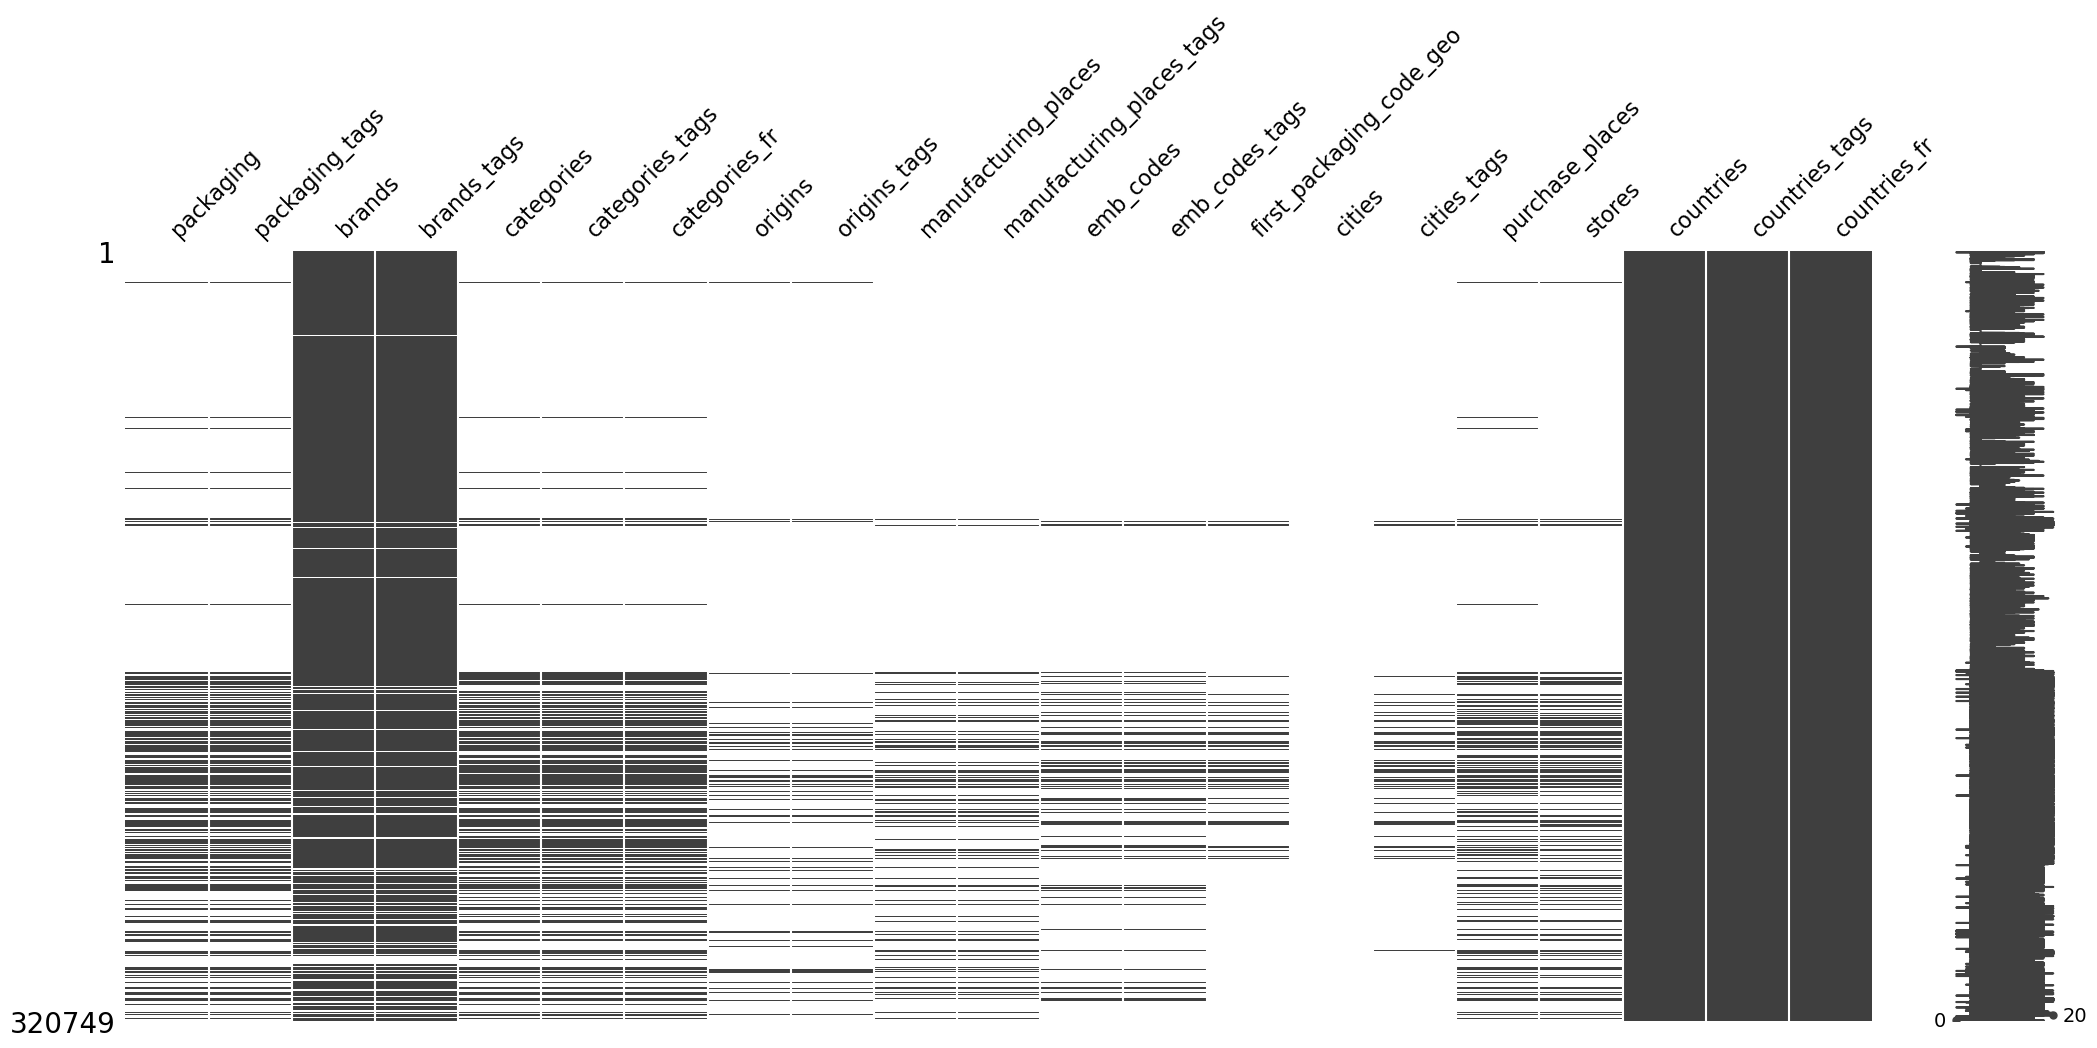

In [28]:
# les variables tags
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(tags)]]);

In [29]:
openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(tags)]].isna().sum()/nbLigne

packaging                    0.753826
packaging_tags               0.753823
brands                       0.088508
brands_tags                  0.088533
categories                   0.736900
categories_tags              0.736900
categories_fr                0.736900
origins                      0.930887
origins_tags                 0.931002
manufacturing_places         0.886269
manufacturing_places_tags    0.886288
emb_codes                    0.908633
emb_codes_tags               0.908645
first_packaging_code_geo     0.941378
cities                       1.000000
cities_tags                  0.936720
purchase_places              0.818643
stores                       0.838818
countries                    0.000873
countries_tags               0.000873
countries_fr                 0.000873
dtype: float64

In [30]:
# les données de catégories
openfoodfacts[['code','categories_fr','categories','categories_tags','main_category','main_category_fr']].isna().sum()/nbLigne


code                0.000000
categories_fr       0.736900
categories          0.736900
categories_tags     0.736900
main_category       0.736972
main_category_fr    0.736972
dtype: float64

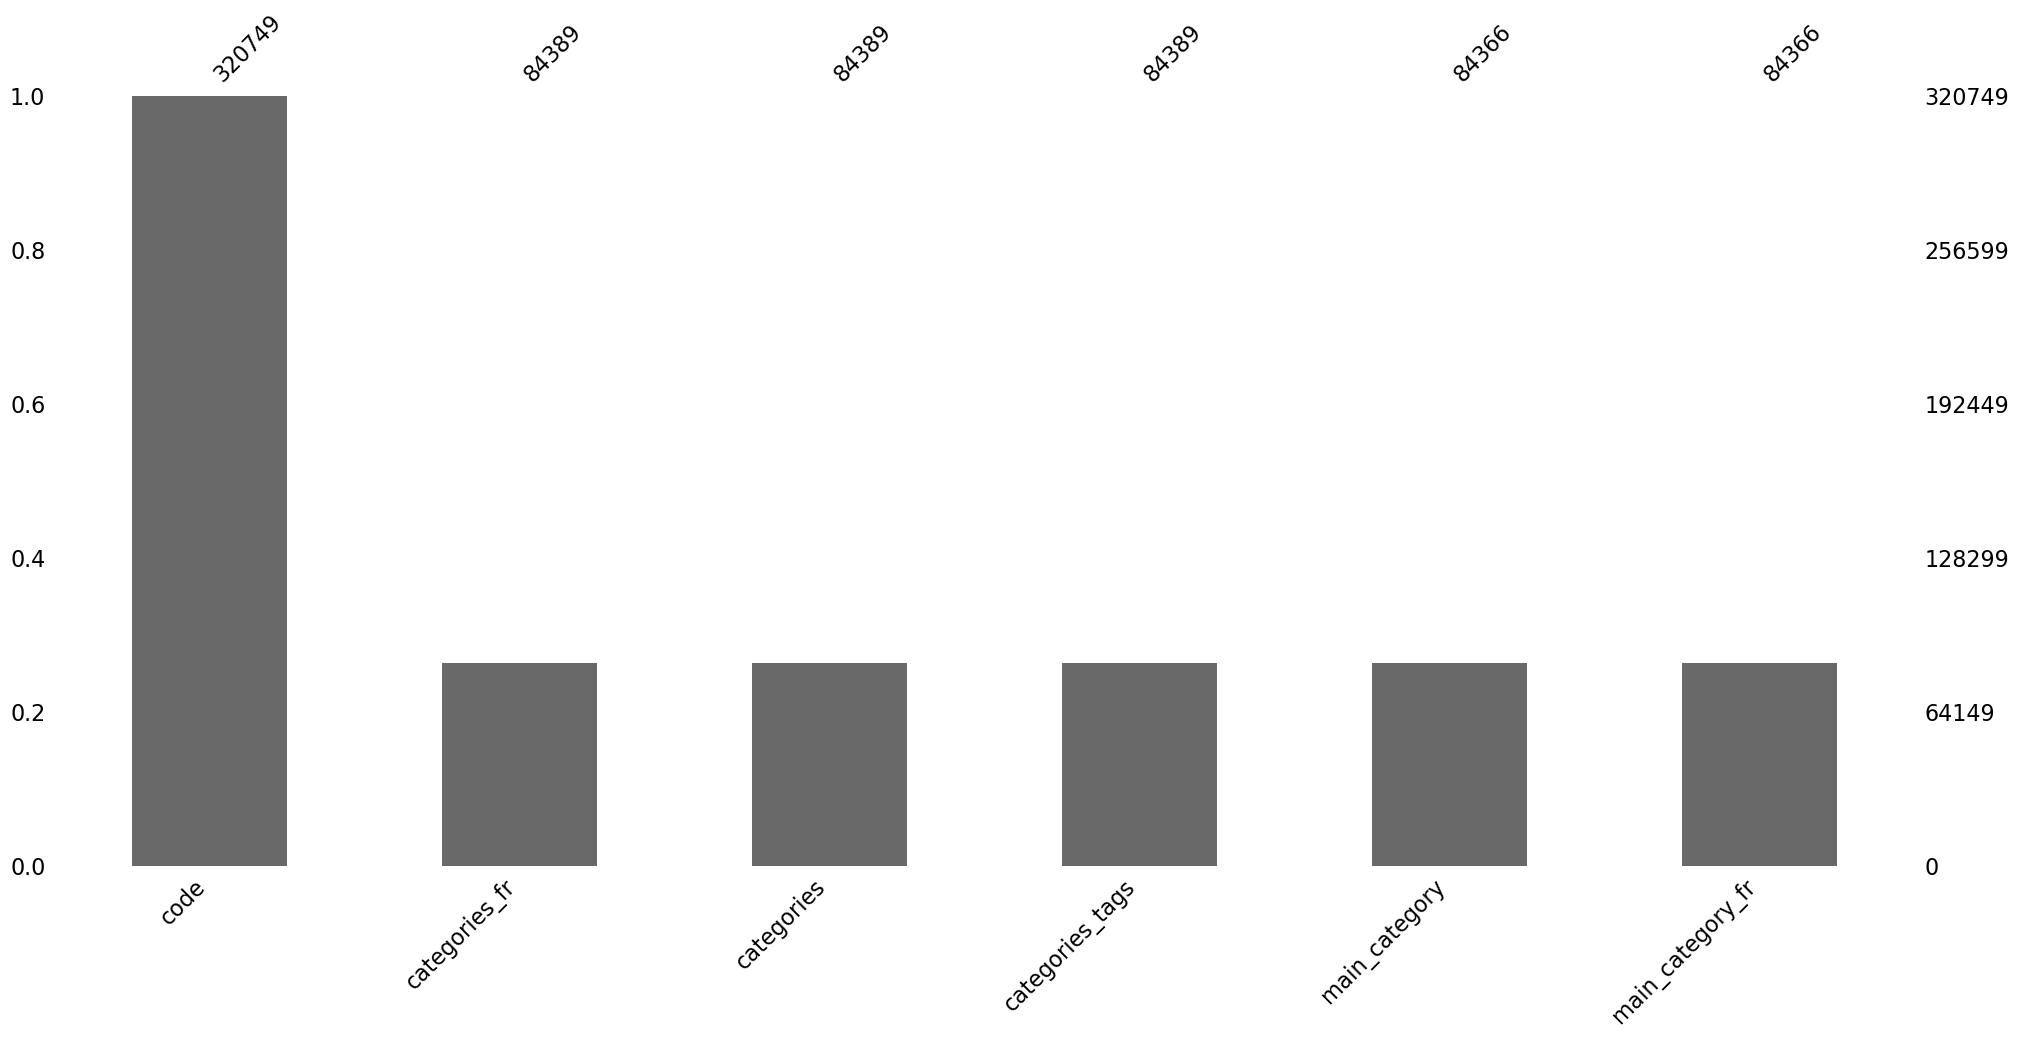

In [31]:
msno.bar(openfoodfacts[['code','categories_fr','categories','categories_tags','main_category','main_category_fr']]);

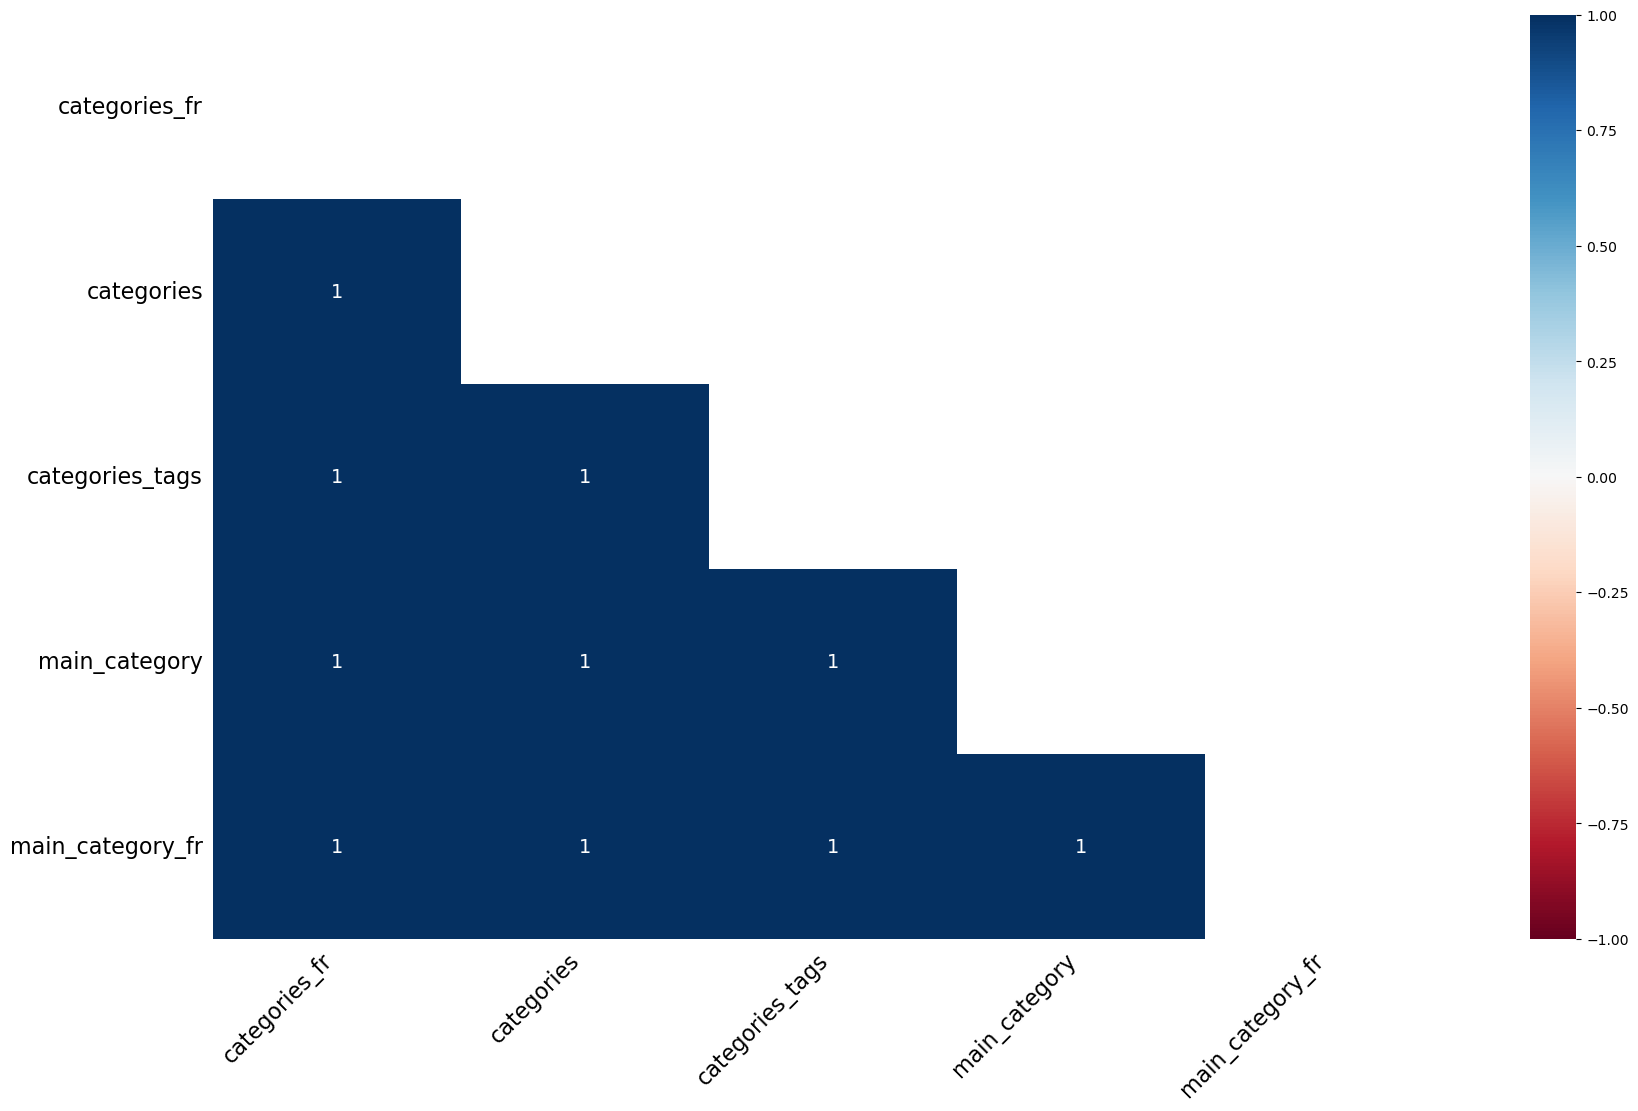

In [32]:
msno.heatmap( openfoodfacts[['categories_fr','categories','categories_tags','main_category','main_category_fr']] );

main_categorie et categories_fr sont rempli de la meme façon.

In [33]:
# tags
col_to_drop += [ 'packaging','packaging_tags','brands','brands_tags',
                'origins','origins_tags','manufacturing_places','manufacturing_places_tags',
                'cities','cities_tags','countries','countries_tags','countries_fr',
                'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
                'categories', 'categories_tags',
                'purchase_places', 'stores']

colgarder += ['categories_fr']

#Maj tags
[tags.remove(x) for x in [ 'packaging','packaging_tags','brands','brands_tags','emb_codes', 'emb_codes_tags', 
                           'origins','origins_tags','manufacturing_places','manufacturing_places_tags',
                          'cities','cities_tags','countries','countries_tags','countries_fr',
                          'first_packaging_code_geo','purchase_places', 'stores','categories', 
                          'categories_tags']]
tags

['categories_fr']

In [34]:
# Il n'est pas possible de créer une super variable catégories
# Idée trouver modele category ~ f(X)

</br>

</br>

</br>

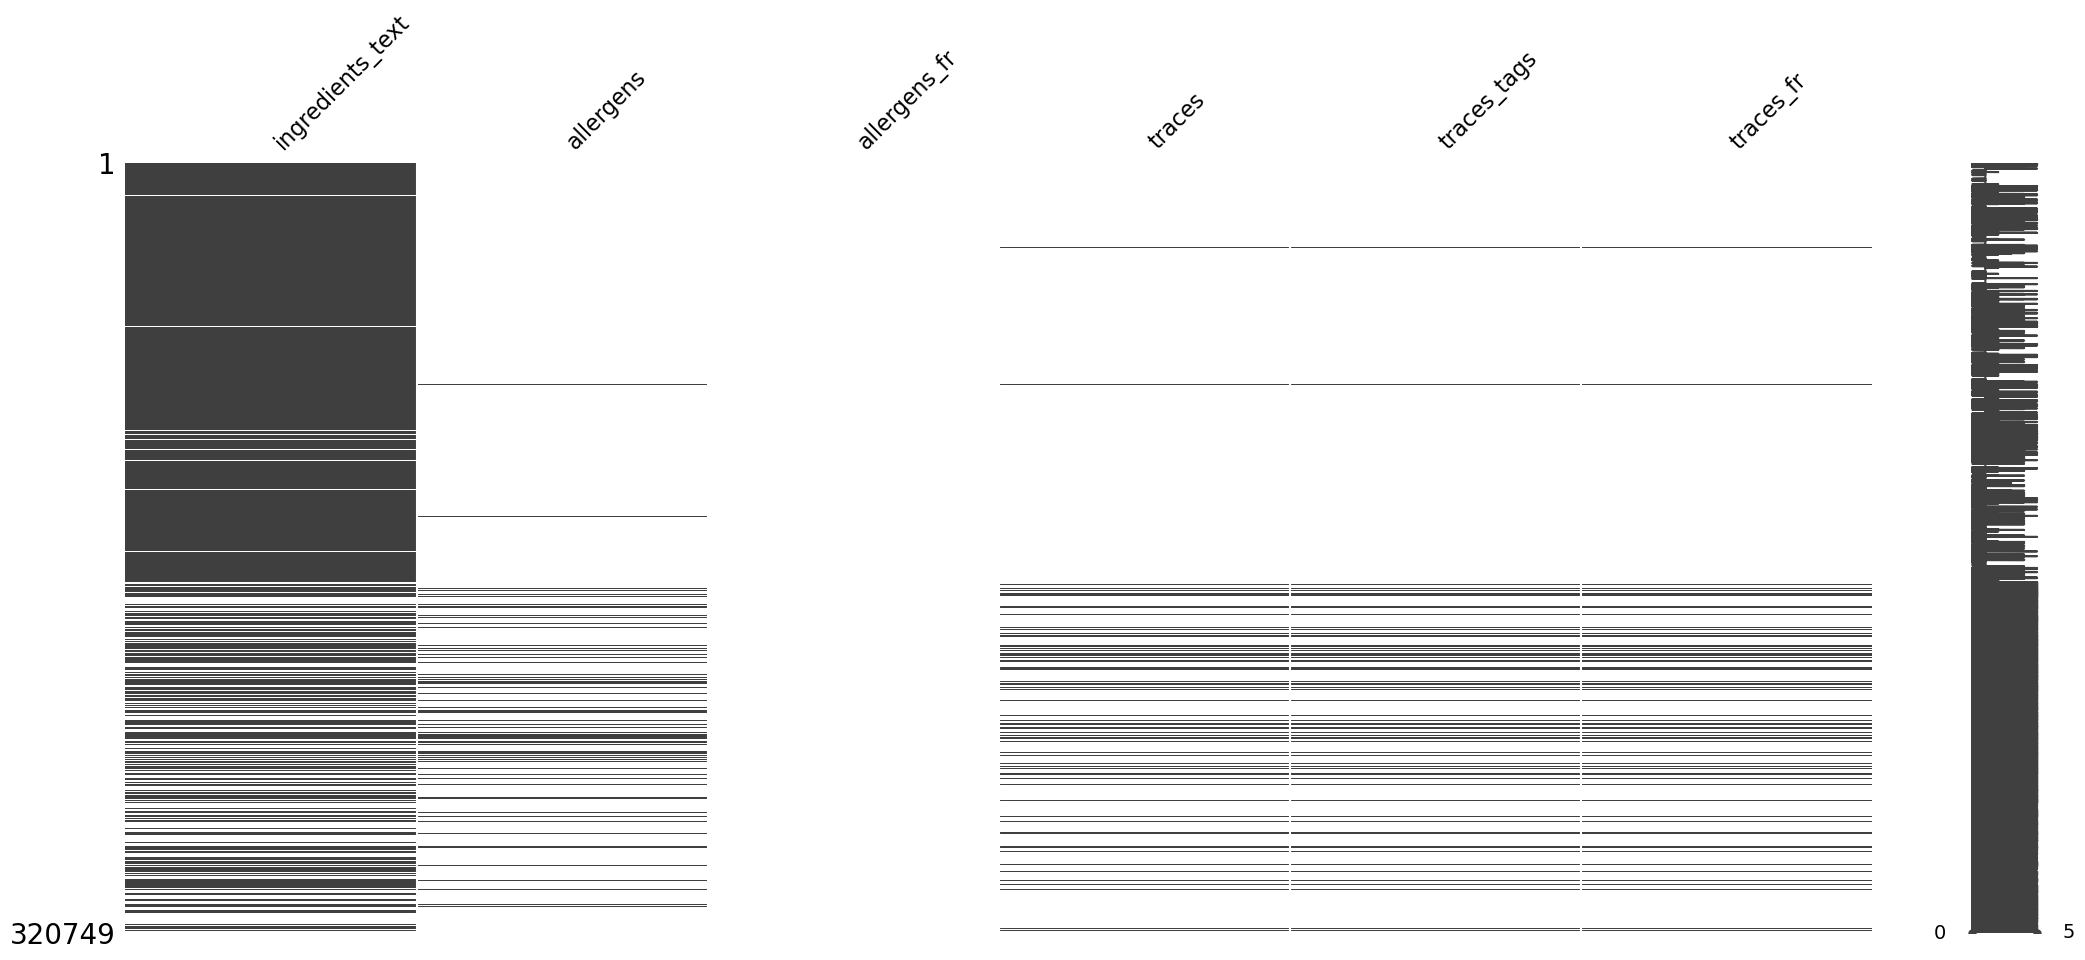

In [35]:
#les variables ingredients
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(ingredients)]]);

In [36]:
# ingredients
col_to_drop += ['ingredients_text','allergens', 'allergens_fr', 'traces', 'traces_tags','traces_fr']
#colgarder += ['ingredients_text']

#Maj tags
[ingredients.remove(x) for x in [ 'ingredients_text','allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr']]
ingredients

[]

In [37]:
openfoodfacts.loc[openfoodfacts.code=='3017620422003']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
187410,3017620422003,http://world-fr.openfoodfacts.org/produit/3017...,openfoodfacts-contributors,1457680652,2016-03-11T07:17:32Z,1491264285,2017-04-04T00:04:45Z,Nutella® - Ferrero,Pâte à tartiner aux noisettes et au cacao.,400 g,"Bocal,Verre,Couvercle,Plastique","bocal,verre,couvercle,plastique",Ferrero,ferrero,"Produits à tartiner,Petit-déjeuners,Produits à...","en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Produits à tartiner,Petit-déjeuners,Produits à...",NaN,NaN,NaN,NaN,Sans gluten,en:gluten-free,Sans gluten,NaN,NaN,NaN,NaN,NaN,F - 77480 Mousseaux les Bray,Bi1,"Belgique,France","en:belgium,en:france","Belgique,France","Ingrédients : sucre, huile de palme, NOISETI'E...","LAIT, SOJA, GLUTEN",NaN,NaN,NaN,NaN,15 g,NaN,1.0,[ ingredients -> fr:ingredients ] [ sucre -...,en:e322,E322 - Lécithines,1.0,NaN,huile-de-palme,0.0,NaN,NaN,NaN,e,Sugary snacks,Sweets,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",fr:pates-a-tartiner,Pâtes à tartiner,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,2278.0,NaN,31.6,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.6,56.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,0.1

</br>

</br>

</br>

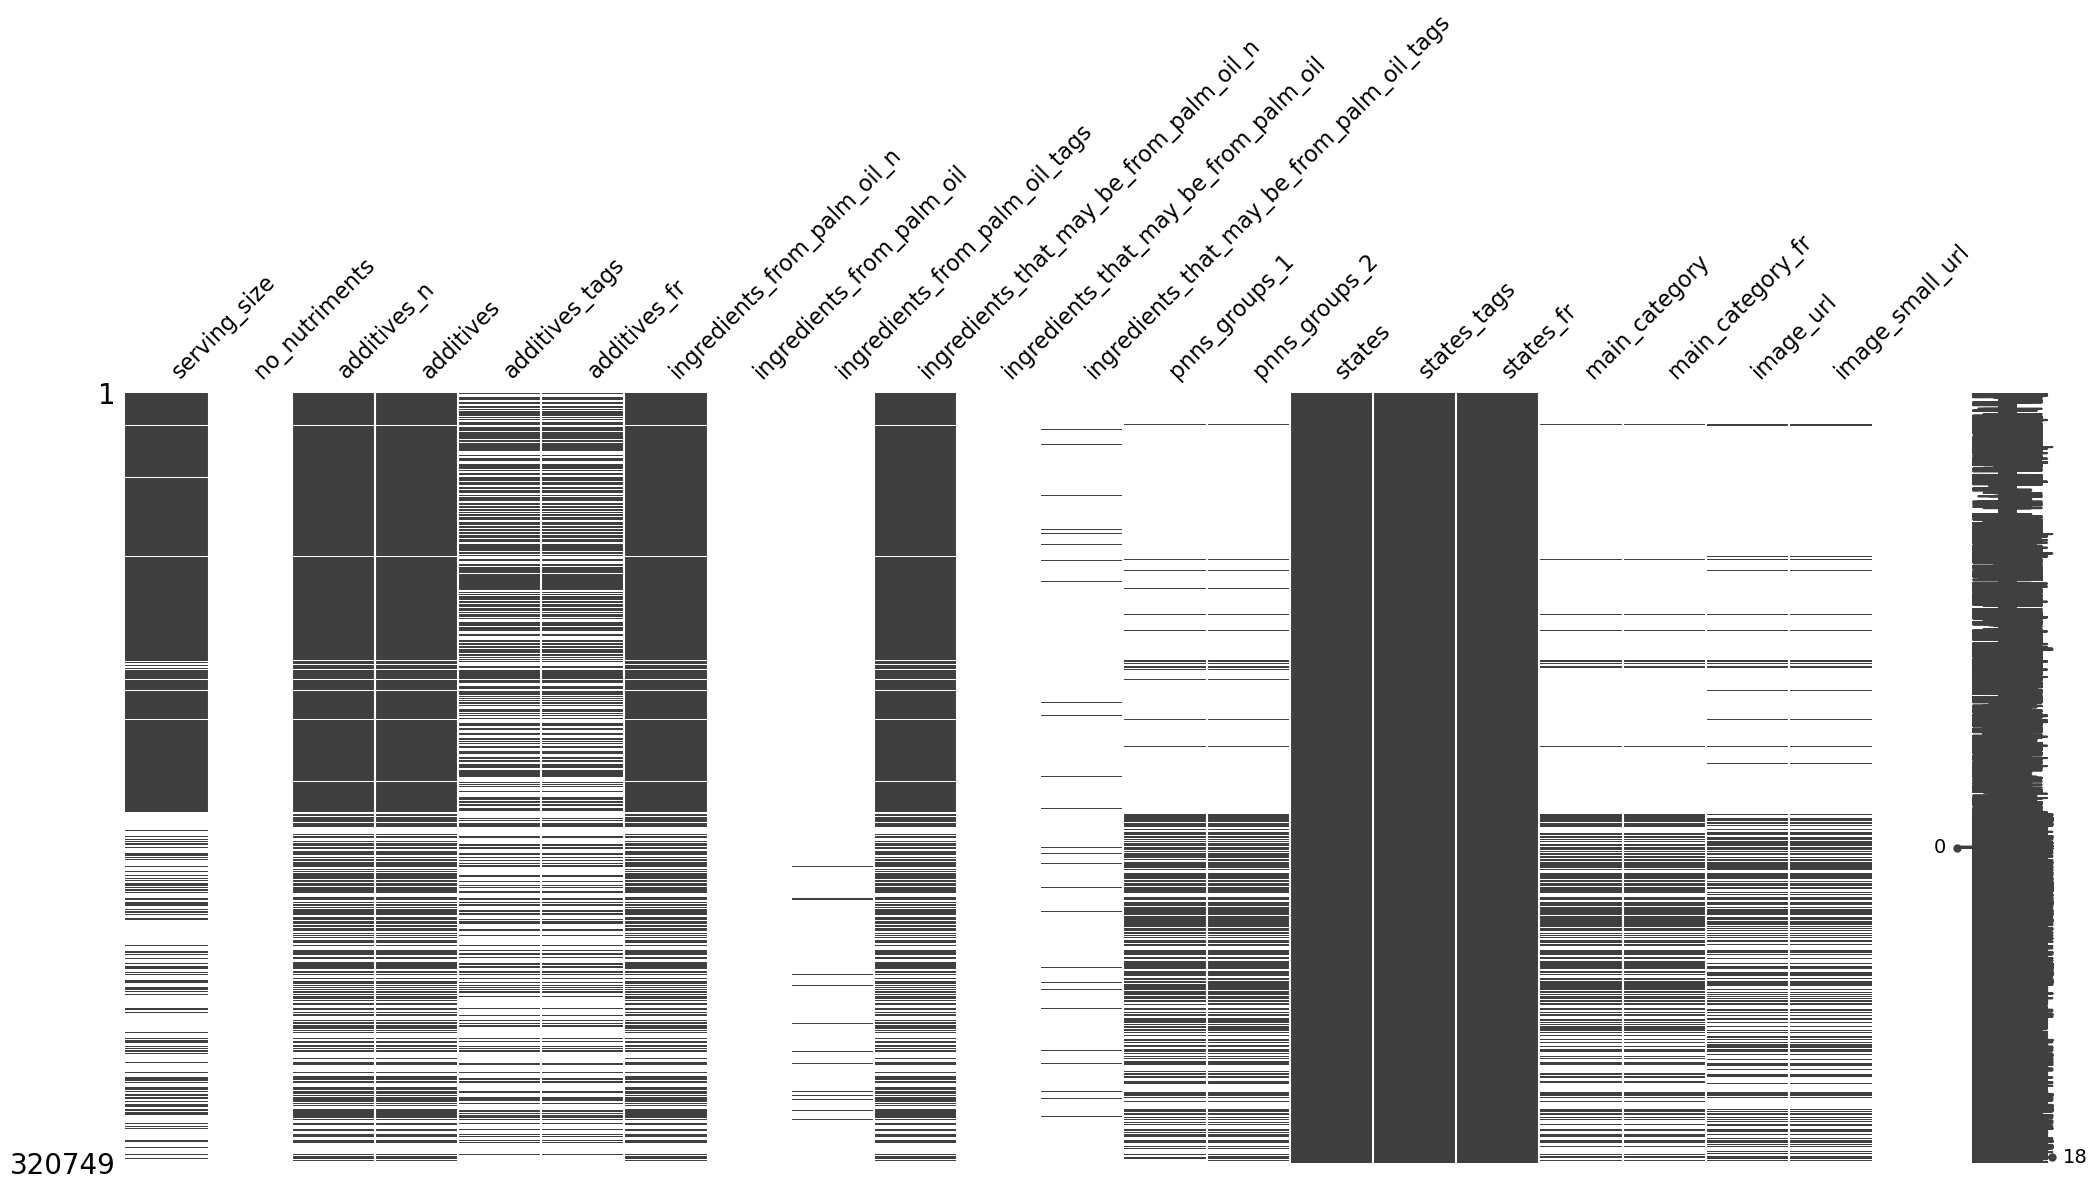

In [38]:
#les variables misc_data
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(misc_data)]]);

In [39]:
misc_data

['serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url']

In [40]:
# creation colonne "ingredients_from_palm_oil_nb"

In [41]:
# misc_data
col_to_drop += ['no_nutriments',
                'additives','additives_tags','additives_fr',
                'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
                'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags',
                'pnns_groups_1', 'pnns_groups_2',
                'states', 'states_tags', 'states_fr',
                'main_category',
                'image_url', 'image_small_url']


colgarder += ['serving_size','additives_n', 'main_category_fr',
              'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n',]

#Maj tags
[misc_data.remove(x) for x in [ 'no_nutriments',
                               'additives','additives_tags','additives_fr', 
                               'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
                               'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 
                               'pnns_groups_1', 'pnns_groups_2',
                               'states', 'states_tags', 'states_fr',
                               'main_category',
                               'image_url', 'image_small_url']]
misc_data

['serving_size',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'main_category_fr']

</br>

</br>

</br>

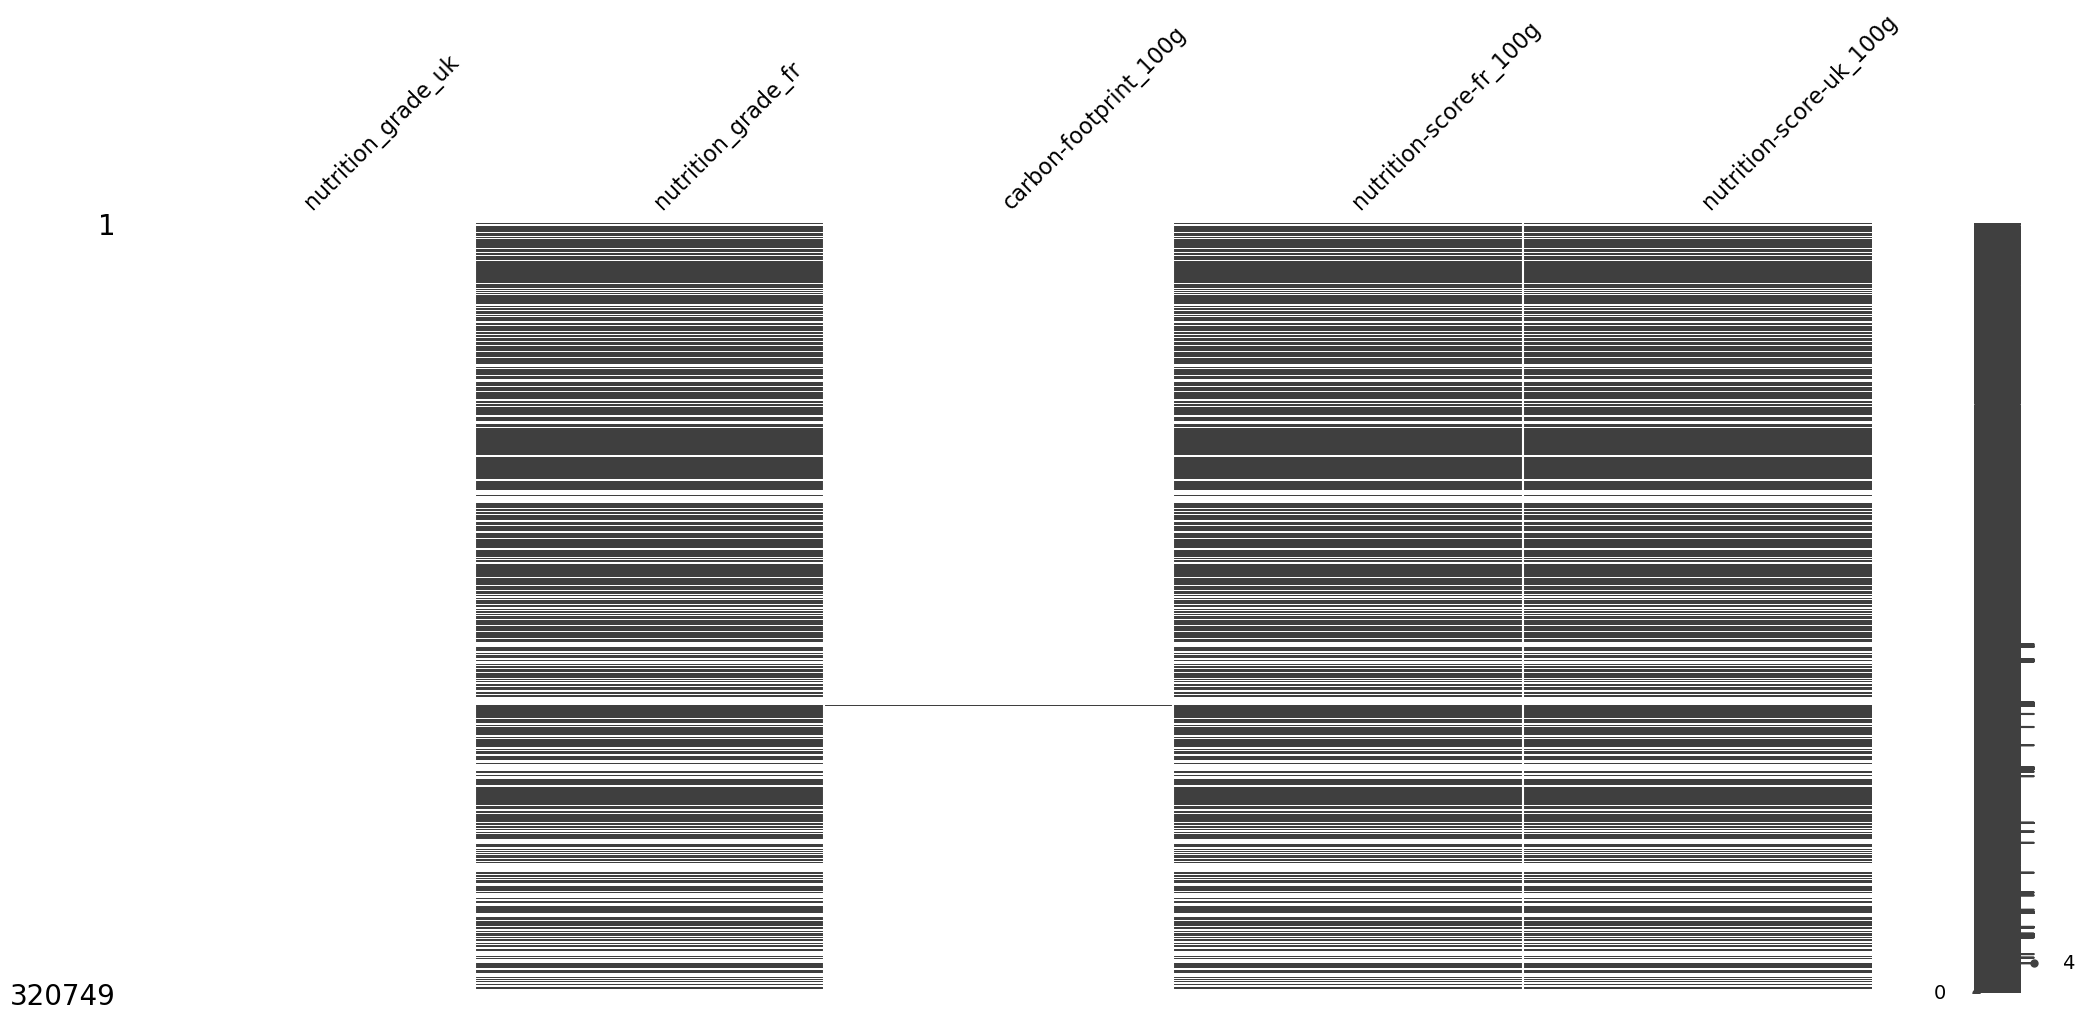

In [42]:
# les variables score_foot_print
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(score_foot_print)]]);

In [43]:
openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(score_foot_print)]].isna().sum()/nbLigne

nutrition_grade_uk         1.000000
nutrition_grade_fr         0.310333
carbon-footprint_100g      0.999164
nutrition-score-fr_100g    0.310333
nutrition-score-uk_100g    0.310333
dtype: float64

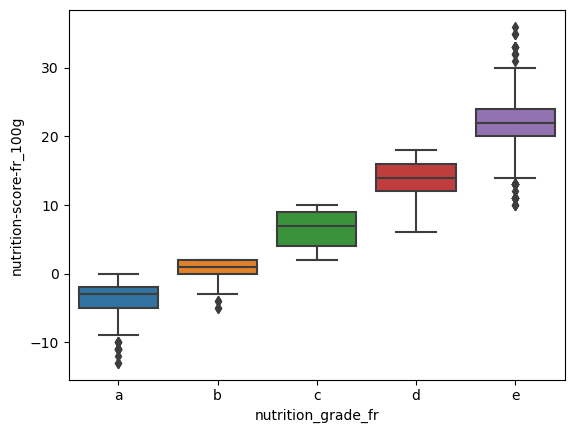

In [44]:
#openfoodfacts[[ 'nutrition-score-fr_100g', 'openfoodfacts.nutrition_grade_fr']].boxplot()
sns.boxplot(y='nutrition-score-fr_100g',
            x='nutrition_grade_fr',
            data=openfoodfacts.sample(10000).sort_values(by='nutrition_grade_fr'));

In [45]:
# score_foot_print
col_to_drop += ['nutrition_grade_uk','carbon-footprint_100g', 'nutrition-score-uk_100g']

colgarder += ['nutrition_grade_fr', 'nutrition-score-fr_100g']

#Maj tags
[score_foot_print.remove(x) for x in ['nutrition_grade_uk','carbon-footprint_100g', 'nutrition-score-uk_100g']]
score_foot_print

['nutrition_grade_fr', 'nutrition-score-fr_100g']

</br>

</br>

</br>

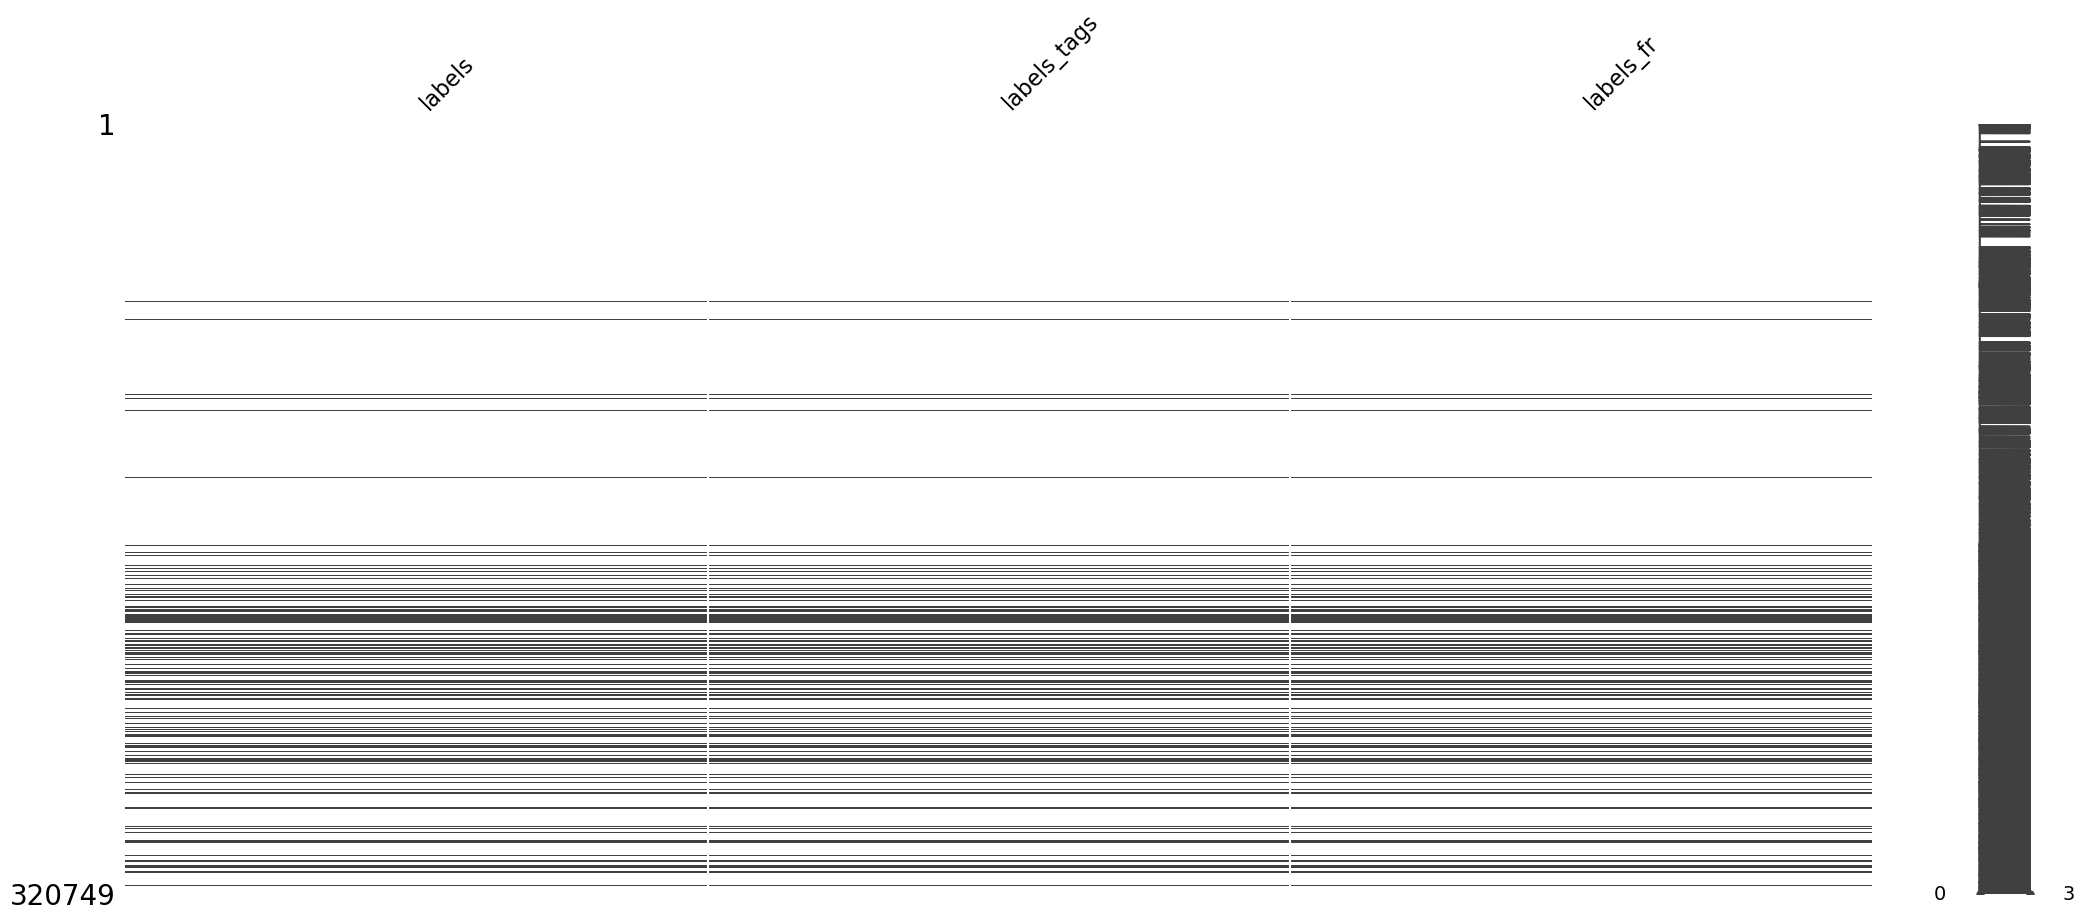

In [46]:
# les variables score_foot_print
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(labels)]]);

In [47]:
openfoodfacts[openfoodfacts.labels.notna()][openfoodfacts.columns[openfoodfacts.columns.isin(labels)]].sample(5)

,labels,labels_tags,labels_fr
223887,"Sans colorants,Sans sucre ajouté,Sans conserva...","en:low-or-no-sugar,en:no-colorings,en:no-prese...","Peu ou pas de sucre,Sans colorants,Sans conser..."
262594,"Organic, EU Organic, fr:AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique"
207653,"Bio,Bio européen,FR-BIO-01,AB Agriculture Biol...","en:organic,en:eu-organic,en:fr-bio-01,fr:ab-ag...","Bio,Bio européen,FR-BIO-01,AB Agriculture Biol..."
245832,Produit en braille,en:in-braille,Produit en braille
239217,"IGP,Certifié par Certipaq,Fabriqué en Alsace","en:pgi,fr:certifie-par-certipaq,fr:fabrique-en...","IGP,Certifie-par-certipaq,Fabrique-en-alsace"


In [48]:
openfoodfacts[openfoodfacts.labels.notna()][openfoodfacts.columns[openfoodfacts.columns.isin(labels)]].describe()

,labels,labels_tags,labels_fr
count,46559,46554,46554
unique,18114,13652,13652
top,"Organic, EU Organic, fr:AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique"
freq,3223,5311,5311


In [49]:
openfoodfacts['presenceDeLabels'] = openfoodfacts.labels.notna()*1


# MAJ du DF nomColonnes
nomColonnes = pd.concat([nomColonnes,pd.DataFrame({'Colonnes':'presenceDeLabels',
                                                   'type_de_colonne':'score_foot_print',
                                                   'Nombre NA':openfoodfacts.presenceDeLabels.isna().sum()},
                                                 index = [openfoodfacts.presenceDeLabels.isna().sum()])], 
                        axis=0)

In [50]:
# labels

# Variables à supprimer
col_to_drop += ['labels','labels_tags','labels_fr']

# Variables à conserver
colgarder += ['presenceDeLabels']

#Maj tags
[labels.remove(x) for x in ['labels','labels_tags','labels_fr']]
labels

[]

</br>

</br>

</br>

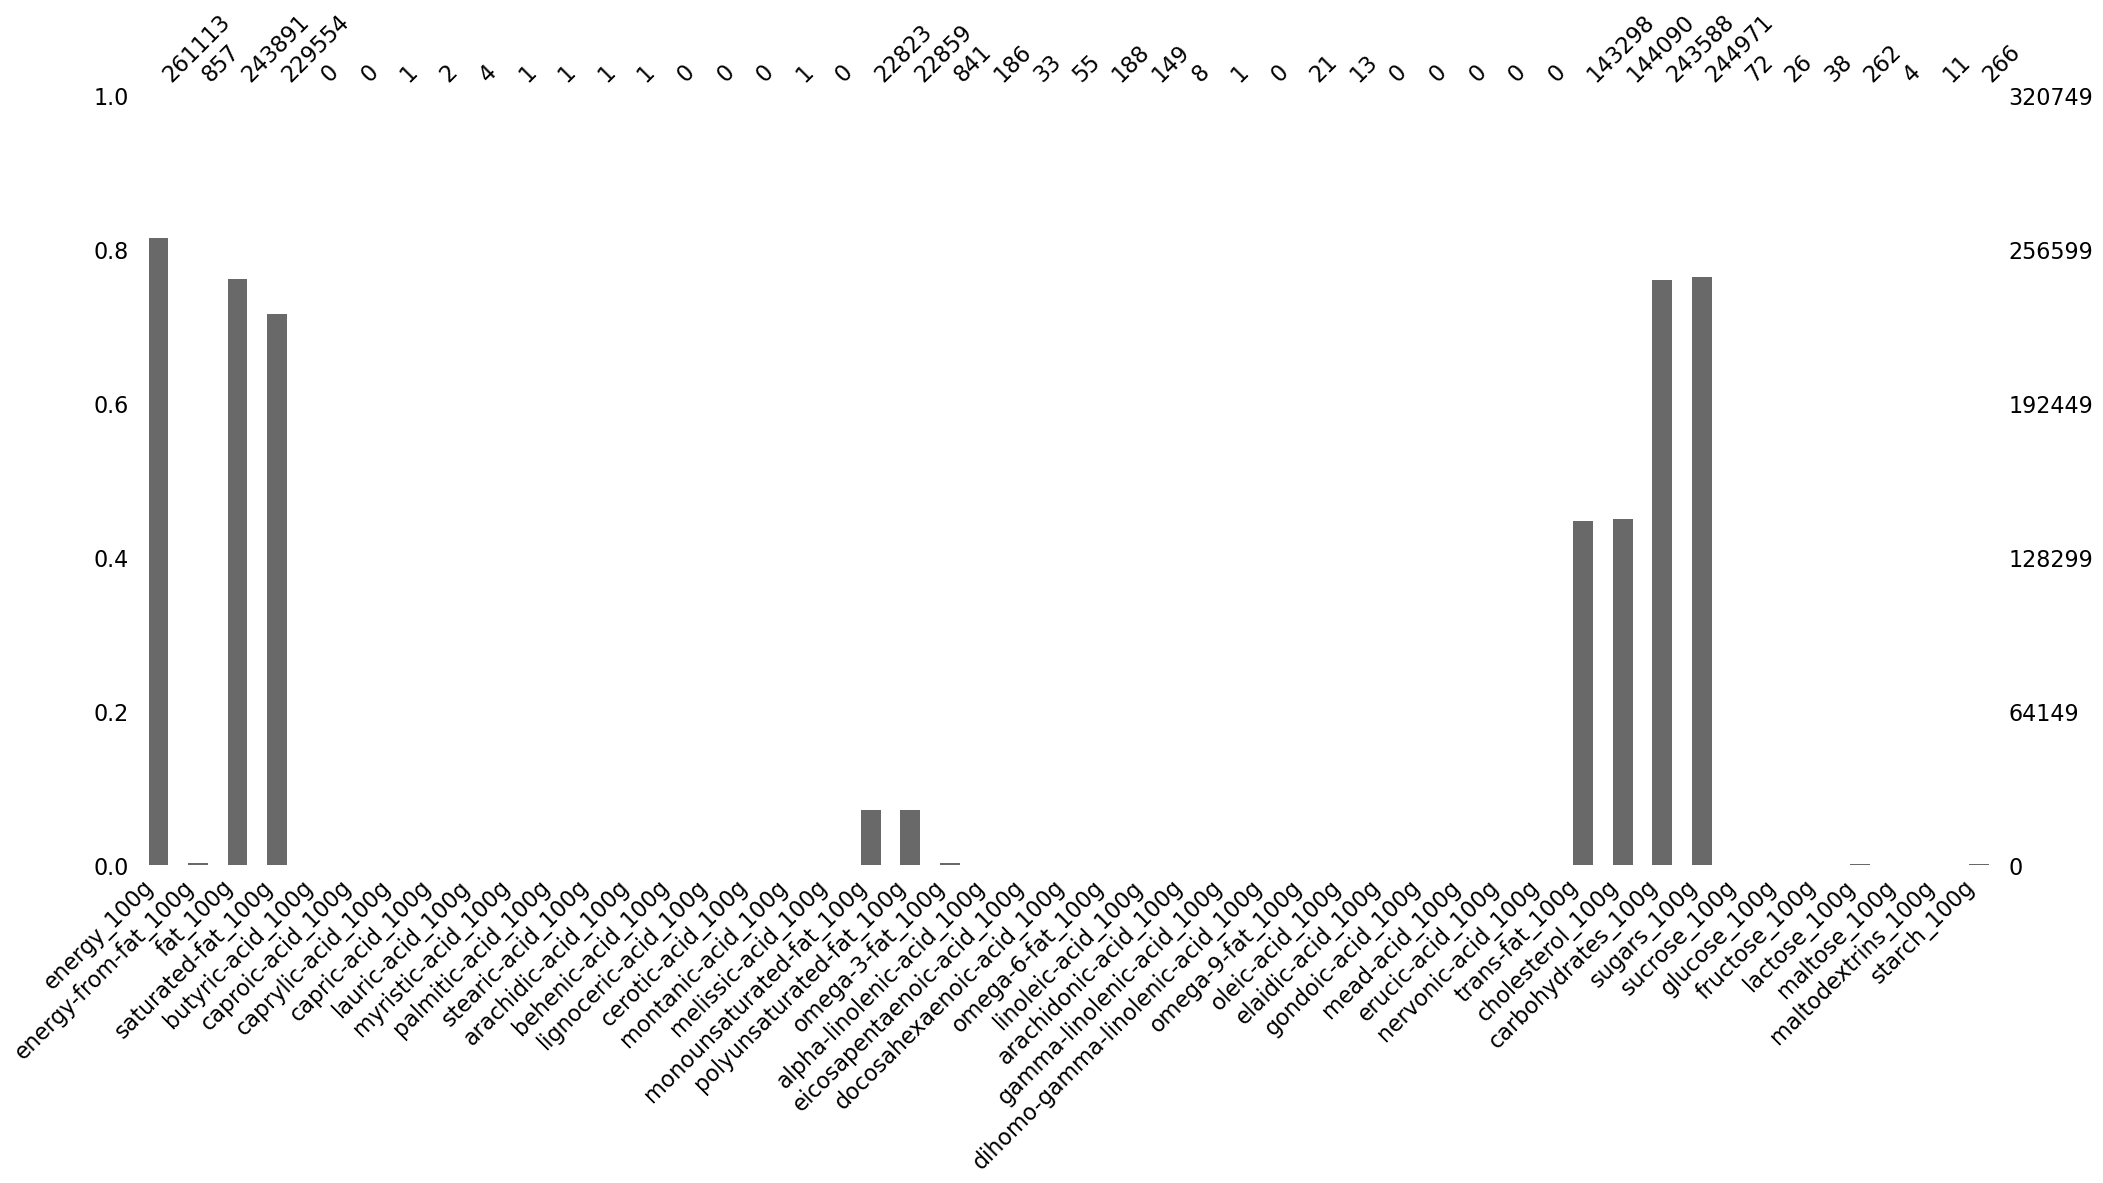

In [51]:
# nutrition_facts
msno.bar(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(nutrition_facts)][:47] ]);

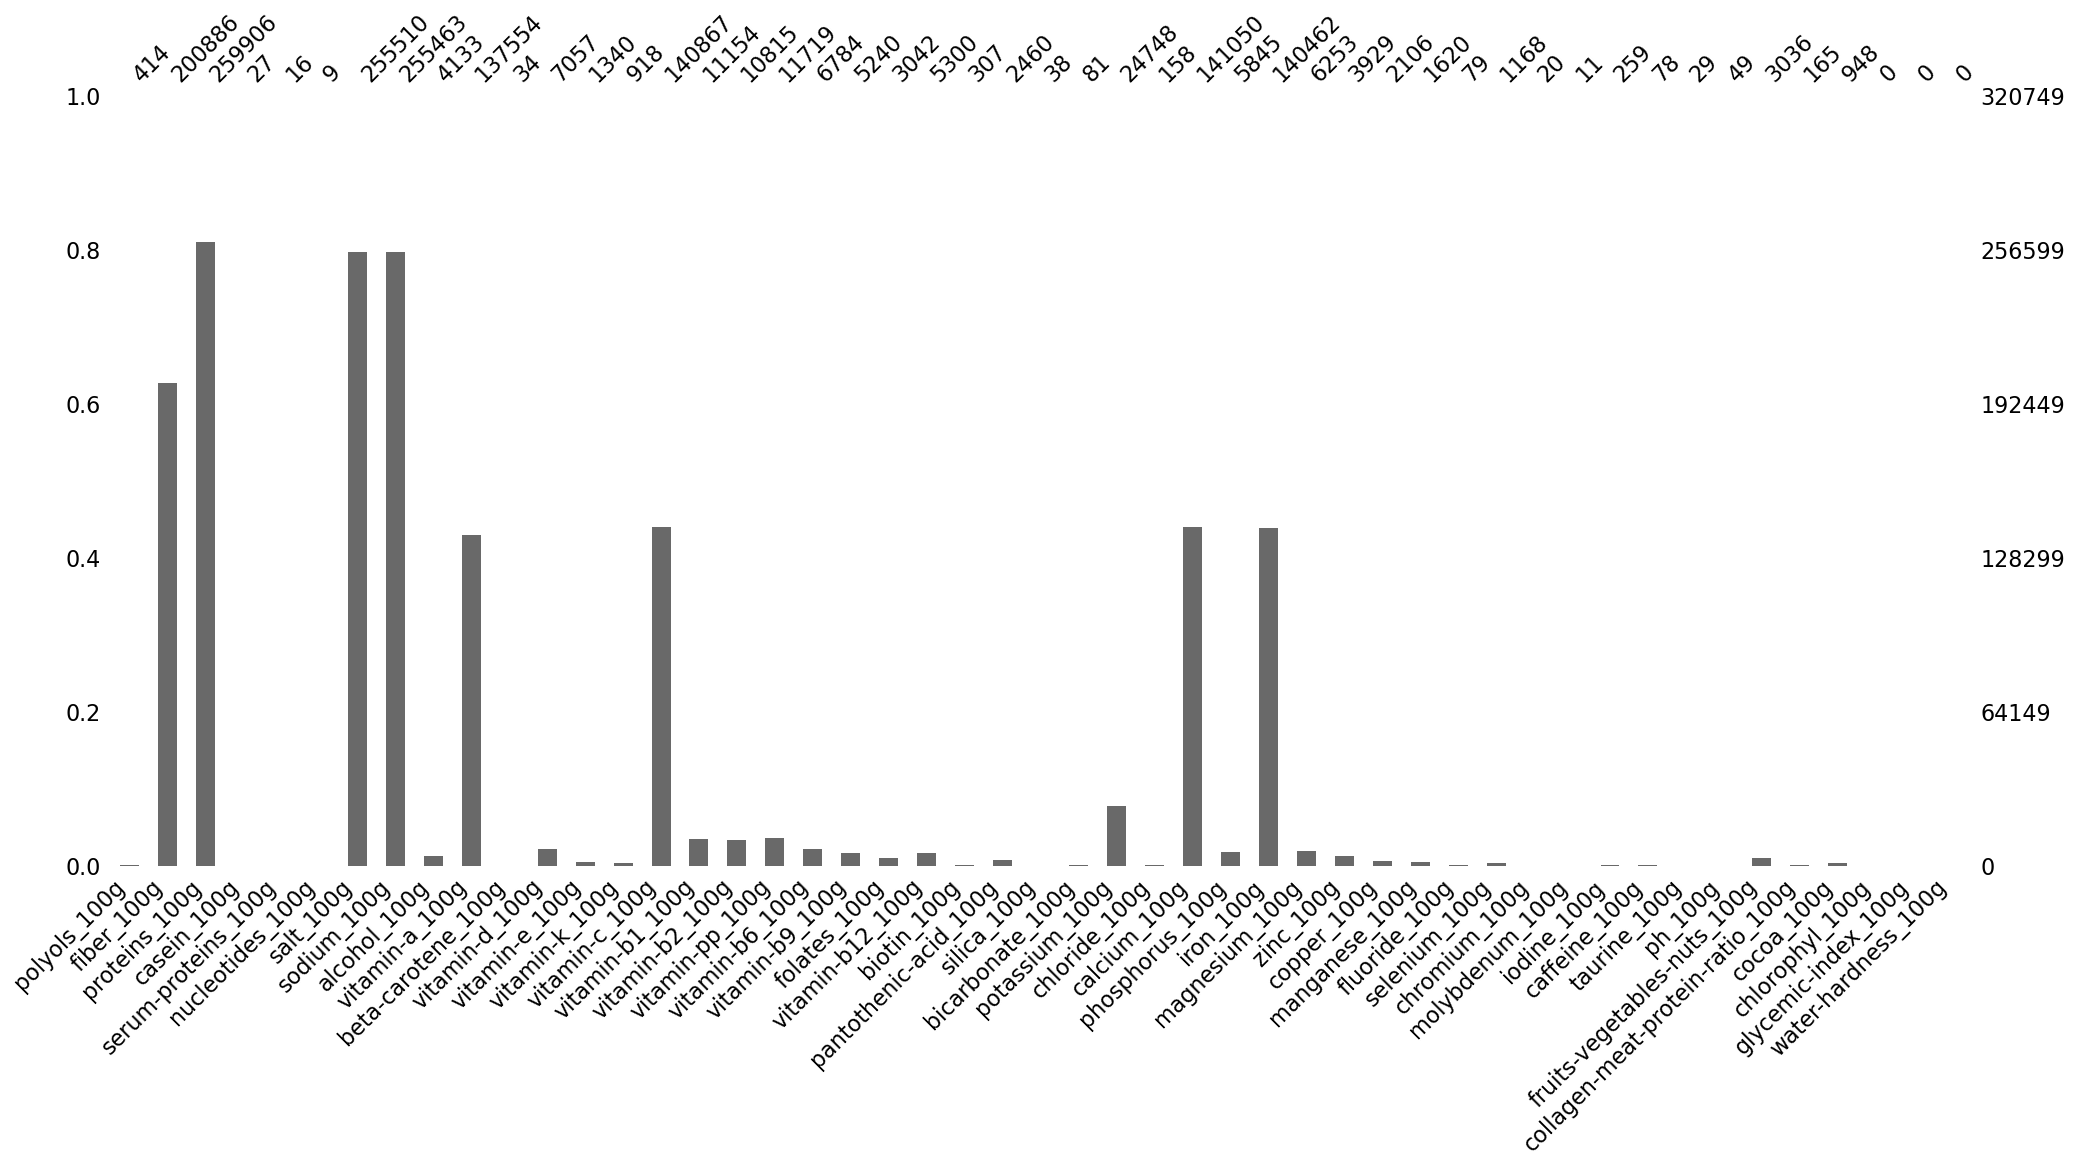

In [52]:
msno.bar(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(nutrition_facts)][47:] ]);

In [53]:
pd.DataFrame(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(nutrition_facts)] ].isna().sum()/nbLigne).T\
.style.background_gradient(cmap='Blues').format("{:.2%}")

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,glycemic-index_100g,water-hardness_100g
0,18.59%,99.73%,23.96%,28.43%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,92.88%,92.87%,99.74%,99.94%,99.99%,99.98%,99.94%,99.95%,100.00%,100.00%,100.00%,99.99%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,55.32%,55.08%,24.06%,23.63%,99.98%,99.99%,99.99%,99.92%,100.00%,100.00%,99.92%,99.87%,37.37%,18.97%,99.99%,100.00%,100.00%,20.34%,20.35%,98.71%,57.11%,99.99%,97.80%,99.58%,99.71%,56.08%,96.52%,96.63%,96.35%,97.88%,98.37%,99.05%,98.35%,99.90%,99.23%,99.99%,99.97%,92.28%,99.95%,56.02%,98.18%,56.21%,98.05%,98.78%,99.34%,99.49%,99.98%,99.64%,99.99%,100.00%,99.92%,99.98%,99.99%,99.98%,99.05%,99.95%,99.70%,100.00%,100.00%,100.00%


Au total le jeu de données contient 96 colonnes contenant des informations sur les valeurs nutritives. 
Parmi ces colonnes, 81 sont composées de plus de 60% de valeurs manquantes


''

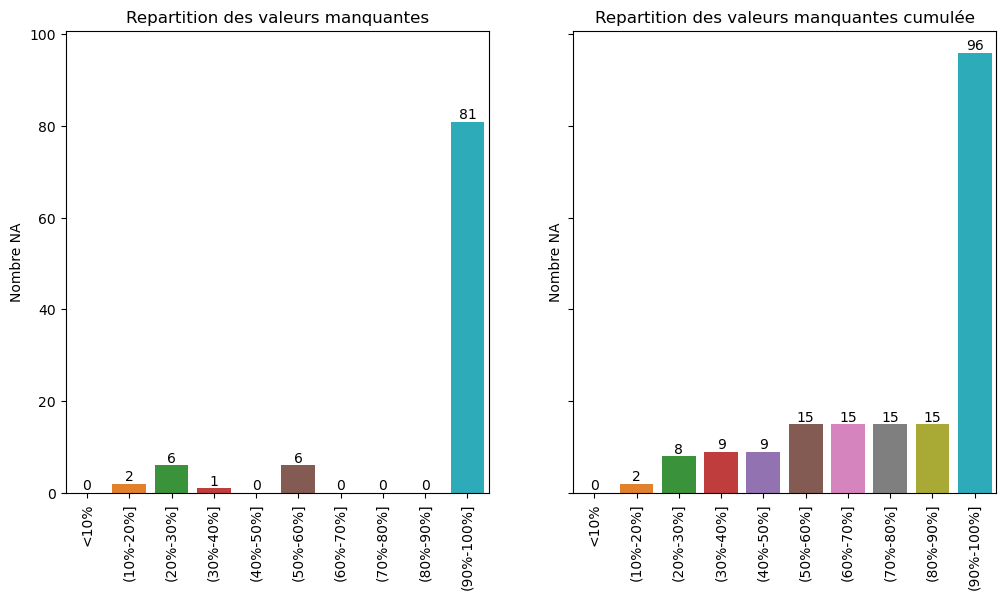

In [54]:
thresold = 0.6
print('Au total le jeu de données contient {} colonnes contenant des informations sur les valeurs nutritives. \nParmi ces colonnes, {} sont composées de plus de {pourc:.0%} de valeurs manquantes'
      .format((nomColonnes.type_de_colonne=='nutrition_facts').sum(),
              (openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(nutrition_facts)] ].isna().sum()>=nbLigne*thresold).sum(),pourc=thresold
              ))

nbin = 10
interbin = 100/nbin

xlab = ['<{:.0f}%'.format(interbin) if i==0 else '({:.0f}%-{:.0f}%]'.format(i*interbin,(i+1)*interbin) for i in range(nbin)]
ycut = pd.cut(nomColonnes[nomColonnes.type_de_colonne=='nutrition_facts']['Nombre NA']/nbLigne, 
                     [ i/nbin for i in range(nbin+1)], # ajoute 1 pour obtenir la derniere tranche
                     include_lowest=False).value_counts().sort_index()

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

axes[0].set_title('Repartition des valeurs manquantes')
sns.barplot(x=ycut.index, y=ycut,ax=axes[0] )
axes[0].set_xticks(range(nbin))   # Attention cette fois on ajoute pas +1
axes[0].set_xticklabels(xlab, rotation=90)
axes[0].bar_label(axes[0].containers[0])

axes[1].set_title('Repartition des valeurs manquantes cumulée')
sns.barplot(x=ycut.index, y=ycut.cumsum(),ax=axes[1] )
axes[1].set_xticks(range(nbin))# Attention cette fois on ajoute pas +1
axes[1].set_xticklabels(xlab, rotation=90)
axes[1].bar_label(axes[1].containers[0])

;

''

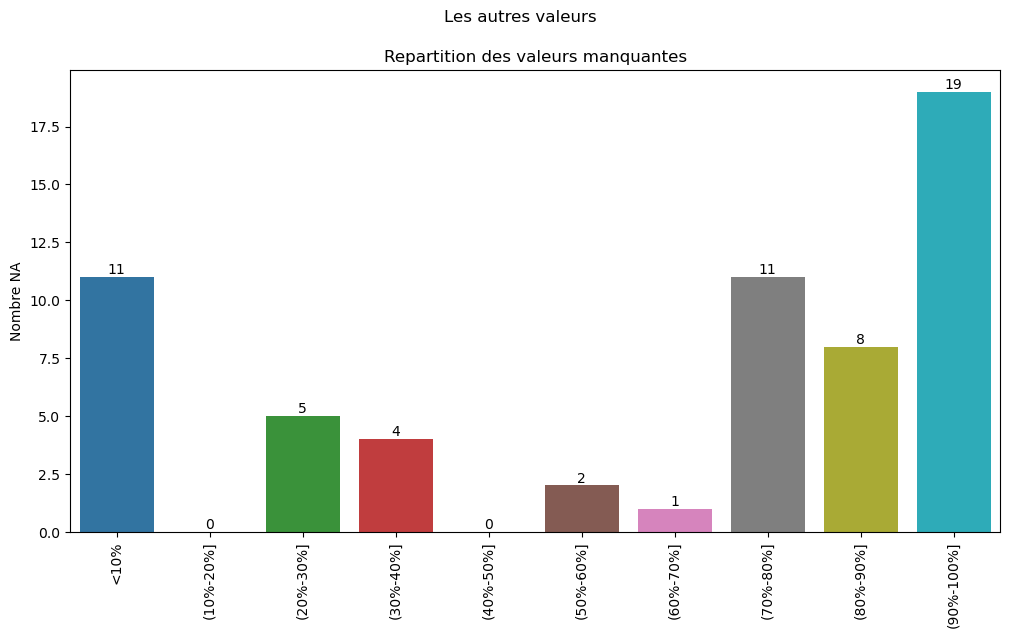

In [55]:
ytotcut = pd.cut(nomColonnes[nomColonnes.type_de_colonne!='nutrition_facts']['Nombre NA']/nbLigne, 
                     [ i/nbin for i in range(nbin+1)], # ajoute 1 pour obtenir la derniere tranche
                     include_lowest=False).value_counts().sort_index()

fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(12, 6))

fig.suptitle('Les autres valeurs')
axes.set_title('Repartition des valeurs manquantes')
sns.barplot(x=ytotcut.index, y=ytotcut,ax=axes )
axes.set_xticks(range(nbin))   # Attention cette fois on ajoute pas +1
axes.set_xticklabels(xlab, rotation=90)
axes.bar_label(axes.containers[0])

;

In [56]:
# nutrition_facts

print('le seuil ',thresold)
for col,typc,nNa in zip(nomColonnes.Colonnes,
                        nomColonnes.type_de_colonne,
                        nomColonnes['Nombre NA']) :
    if typc =='nutrition_facts':
        if nNa >= (nbLigne * thresold): # suppr col qui possèdent 95% de valeurs nulles
            col_to_drop.append(col)
        else:
            colgarder.append(col)

le seuil  0.6


In [57]:
colgarder

['code',
 'product_name',
 'quantity',
 'categories_fr',
 'serving_size',
 'additives_n',
 'main_category_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'nutrition-score-fr_100g',
 'presenceDeLabels',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g']

In [58]:
print('Parmi les {} colonnes, nous en supprimons {} et gardons {}'.format(nbCol,len(col_to_drop),len(colgarder) ) )

Parmi les 162 colonnes, nous en supprimons 136 et gardons 27


</br>

In [59]:
colgarder

['code',
 'product_name',
 'quantity',
 'categories_fr',
 'serving_size',
 'additives_n',
 'main_category_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'nutrition-score-fr_100g',
 'presenceDeLabels',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g']

In [60]:
# A-t-on oublié certaines colonnes
[x  for x in openfoodfacts.columns if x not in col_to_drop+colgarder ]

[]

In [61]:
openfoodfacts.serving_size.dtypes

dtype('O')

In [63]:
etude_test = openfoodfacts[openfoodfacts.columns[(~openfoodfacts.columns.isin(nutrition_facts)) & (openfoodfacts.columns.isin(colgarder))]]\
.drop(columns=['code','product_name','categories_fr','main_category_fr'])

In [64]:
etude_test.columns

Index(['quantity', 'serving_size', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'nutrition-score-fr_100g', 'presenceDeLabels'],
      dtype='object')

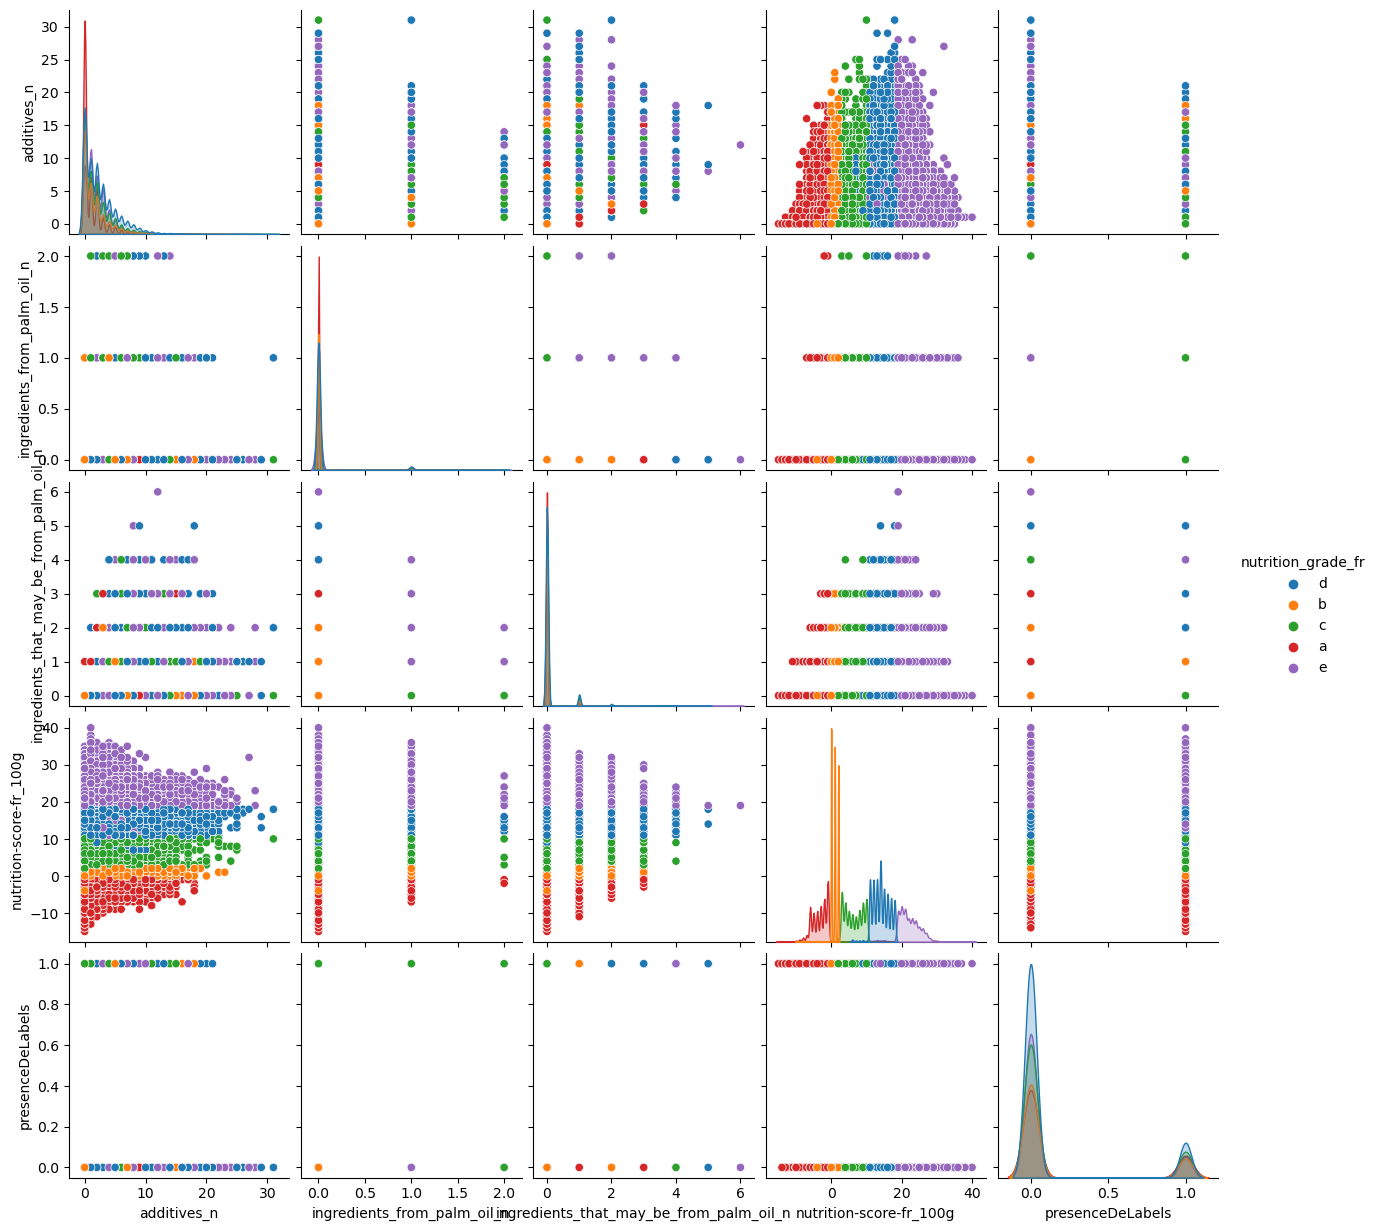

In [65]:
sns.pairplot(etude_test, hue="nutrition_grade_fr")

In [66]:
openfoodfacts[colgarder].corr().style.background_gradient(cmap='Blues').format("{:.2%}")

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,presenceDeLabels,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
additives_n,100.00%,11.99%,28.58%,16.72%,-8.47%,-0.27%,-12.06%,-5.28%,1.37%,-0.47%,15.49%,13.61%,-5.06%,-10.36%,-0.09%,-0.09%,-0.05%,0.27%,-0.23%,-0.31%
ingredients_from_palm_oil_n,11.99%,100.00%,18.68%,11.77%,7.35%,1.16%,6.02%,8.44%,0.51%,-0.06%,7.74%,5.36%,0.07%,-0.77%,-0.08%,-0.08%,0.02%,0.11%,0.27%,0.09%
ingredients_that_may_be_from_palm_oil_n,28.58%,18.68%,100.00%,5.80%,6.28%,0.21%,1.72%,3.21%,1.24%,0.26%,1.71%,0.36%,-1.34%,-3.95%,-0.14%,-0.14%,-0.02%,0.18%,0.00%,0.48%
nutrition-score-fr_100g,16.72%,11.77%,5.80%,100.00%,-8.22%,6.78%,56.77%,62.42%,2.21%,3.09%,26.35%,44.15%,-4.70%,10.84%,0.73%,0.73%,-0.64%,-1.01%,1.73%,-0.14%
presenceDeLabels,-8.47%,7.35%,6.28%,-8.22%,100.00%,0.15%,1.05%,0.58%,0.35%,0.10%,-7.98%,-7.59%,0.91%,3.75%,-0.29%,-0.29%,0.04%,0.15%,0.51%,2.21%
energy_100g,-0.27%,1.16%,0.21%,6.78%,0.15%,100.00%,9.44%,7.37%,2.16%,0.52%,6.11%,5.69%,7.75%,4.48%,-0.06%,-0.06%,0.06%,-0.43%,0.72%,0.39%
fat_100g,-12.06%,6.02%,1.72%,56.77%,1.05%,9.44%,100.00%,68.91%,2.49%,2.19%,-8.78%,-4.74%,13.63%,22.99%,-0.43%,-0.43%,0.22%,-0.93%,0.98%,-0.26%
saturated-fat_100g,-5.28%,8.44%,3.21%,62.42%,0.58%,7.37%,68.91%,100.00%,1.32%,4.40%,-5.11%,15.66%,15.46%,16.64%,-0.22%,-0.22%,0.59%,-0.97%,2.07%,-0.39%
trans-fat_100g,1.37%,0.51%,1.24%,2.21%,0.35%,2.16%,2.49%,1.32%,100.00%,-0.05%,0.66%,0.36%,-0.09%,-1.01%,-0.01%,-0.01%,-0.20%,-0.17%,-0.07%,0.26%
cholesterol_100g,-0.47%,-0.06%,0.26%,3.09%,0.10%,0.52%,2.19%,4.40%,-0.05%,100.00%,-3.64%,-1.67%,-2.39%,4.73%,11.27%,11.27%,0.35%,-0.07%,0.47%,-0.01%


In [67]:
etude_test.serving_size[etude_test.serving_size.notna()].str.lower().str.replace('\\(.+[^(]\\)','',regex=True)\
.str.replace('[0-9]','',regex=True)\
.str.replace('[\\,\\*\\. ]','',regex=True)\
.str.replace(' ','',regex=True).value_counts().index[:5].to_list()+etude_test.quantity[etude_test.quantity.notna()].str.lower().str.replace('\\(.+[^(]\\)','',regex=True)\
.str.replace('[0-9]','',regex=True)\
.str.replace('[\\,\\*\\. ]','',regex=True)\
.str.replace(' ','',regex=True).value_counts().index[:10].to_list()

['g',
 'ml',
 'cl',
 'l',
 '',
 'g',
 'l',
 'ml',
 'cl',
 'kg',
 '',
 'gr',
 'oz',
 'xg',
 'ge']

In [68]:
openfoodfacts[['quantity','url','serving_size']][etude_test.quantity.str.lower().str.replace('\\(.+[^(]\\)','',regex=True)\
.str.replace('[0-9]','',regex=True)\
.str.replace('[\\,\\*\\. ]','',regex=True)\
.str.replace(' ','',regex=True)=='xg'].sample(10)

,quantity,url,serving_size
248151,4x100g,http://world-fr.openfoodfacts.org/produit/3608...,100g
187962,4 x 135 g,http://world-fr.openfoodfacts.org/produit/3019...,NaN
234301,2x90g,http://world-fr.openfoodfacts.org/produit/3456...,90 g
211442,2x375g,http://world-fr.openfoodfacts.org/produit/3256...,NaN
230061,4 x 100 g,http://world-fr.openfoodfacts.org/produit/3384...,NaN
196642,3 x 80 g (240 g),http://world-fr.openfoodfacts.org/produit/3168...,30 g
291097,3x35g,http://world-fr.openfoodfacts.org/produit/7612...,NaN
184846,2 x 100 g,http://world-fr.openfoodfacts.org/produit/2603...,"8,3 g"
291709,2x80g,http://world-fr.openfoodfacts.org/produit/7613...,80g
194928,4 x 70 g,http://world-fr.openfoodfacts.org/produit/3123...,NaN


In [69]:
unites = {
    #les liquides
    'l' : 'litre', 'ml': 'litre', 'cl': 'litre', 'litre': 'litre','litres': 'litre',
    'floz': 'litre', 'xcl':'litre','xml': 'litre', 'g/ml':'litre', 'le':'litre',
    
    # les aliments solides (ou mous)
    'kg': 'poids','g' : 'poids', 'gr': 'poids', 'oz': 'poids', 'xg': 'poids',  'ge': 'poids',
    'grammes': 'poids','г': 'poids',  'xg=g': 'poids', 'ozg': 'poids', 'grs': 'poids', 'lb': 'poids',
    
    # ceux qui peuvent etre definis
    'kg[x]': 'petit pot/yaourt', 'gml': 'bocal/conserve', 'mlg':'creme/sauce',
    
    # part ou portion de ensemble plus grand
    'sachets': 'unité','oeufs': 'unité','tranches': 'unité','x': 'unité',
    
}

unitesAbb = [
    #les liquides
    'l' , 'ml', 'cl', 'litre','litres', 'floz', 'xcl','xml', 'g/ml', 'le',
    
    # les aliments solides (ou mous)
    'kg','g' , 'gr', 'oz', 'xg',  'ge', 'grammes','г',  'xg=g', 'ozg', 'grs', 'lb',
    
    # ceux qui peuvent etre definis
    'kg[x]', 'gml', 'mlg',
    
    # part ou portion de ensemble plus grand
    'sachets','oeufs','tranches','x'
]

In [70]:
#creation colonnes unites mini
openfoodfacts['unites_abb'] = [y if y in unitesAbb else x if x in unitesAbb else np.nan for x,y in zip(openfoodfacts.quantity.str.lower().str.replace('\\(.+[^(]\\)','',regex=True)\
.str.replace('[0-9]','',regex=True)\
.str.replace('[\\,\\*\\. ]','',regex=True)\
.str.replace(' ','',regex=True),
                    openfoodfacts.serving_size.str.lower().str.replace('\\(.+[^(]\\)','',regex=True)\
.str.replace('[0-9]','',regex=True)\
.str.replace('[\\,\\*\\. ]','',regex=True)\
.str.replace(' ','',regex=True) )]

#creation colonnes unites
openfoodfacts['unites'] = [y if not y is np.nan else x for x,y in zip(openfoodfacts.quantity.str.lower().str.replace('\\(.+[^(]\\)','',regex=True)\
.str.replace('[0-9]','',regex=True)\
.str.replace('[\\,\\*\\. ]','',regex=True)\
.str.replace(' ','',regex=True).map(unites),
                    openfoodfacts.serving_size.str.lower().str.replace('\\(.+[^(]\\)','',regex=True)\
.str.replace('[0-9]','',regex=True)\
.str.replace('[\\,\\*\\. ]','',regex=True)\
.str.replace(' ','',regex=True).map(unites))]

<AxesSubplot:>

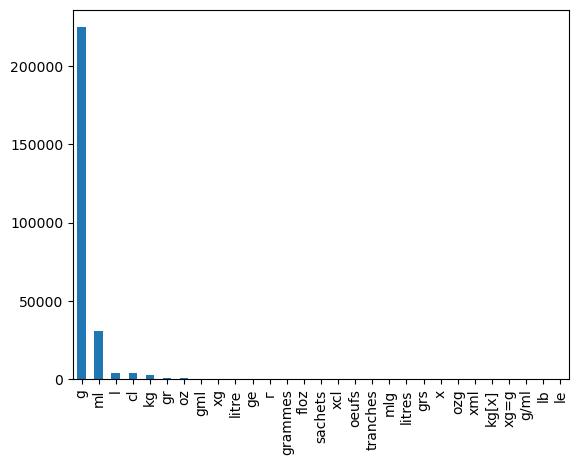

In [71]:
openfoodfacts['unites_abb'].value_counts().plot(kind='bar')

<AxesSubplot:>

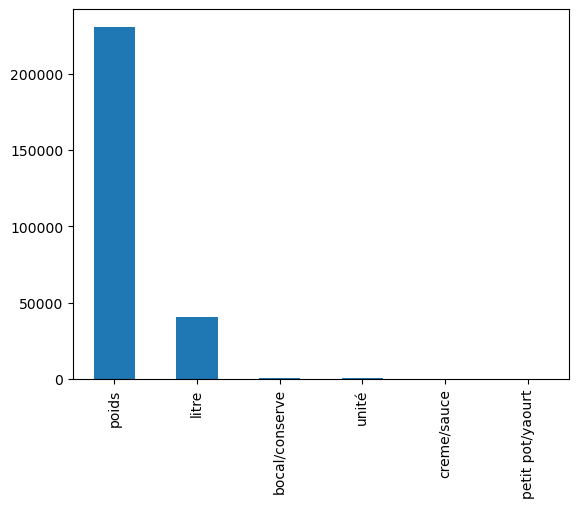

In [72]:
openfoodfacts['unites'].value_counts().plot(kind='bar')

In [73]:
# get dummies
openfoodfacts[['bocal/conserve','creme/sauce','litre','petit pot/yaourt','poids','unité']] = pd.get_dummies(openfoodfacts.unites)

In [74]:
colgarder += ['bocal/conserve','creme/sauce','litre','petit pot/yaourt','poids','unité']

## Gestions des valeurs manquantes

In [75]:
pd.set_option('max_colwidth',-1)

C:\Users\eleor\AppData\Local\Temp\ipykernel_23000\727108189.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth',-1)


In [76]:
#fillna

# nutrition_facts
openfoodfacts[nutrition_facts] = openfoodfacts[nutrition_facts].fillna(0,inplace=False)

## Gestion des outliers

#### les boxplots

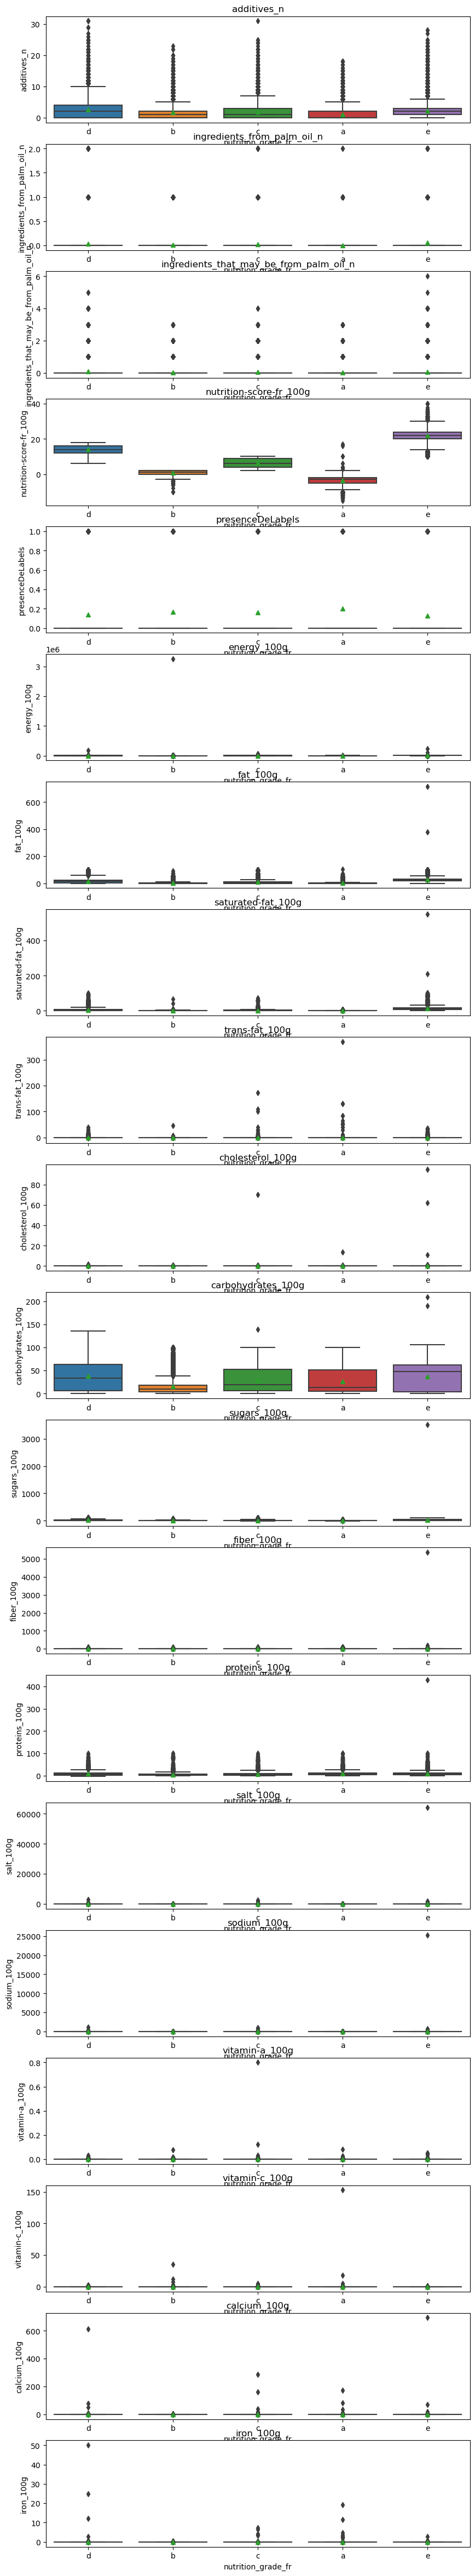

In [123]:
imp = 0
fig,axes = plt.subplots(nrows = 20,ncols = 1,figsize=(10,60))
for i,col in enumerate( colgarder ):
    if openfoodfacts[col].dtypes in ['float64','int32']:
        sns.boxplot(x= 'nutrition_grade_fr', y= col,data = openfoodfacts,ax=axes[i-imp],showmeans=True)
        axes.flatten()[i-imp].set_title(col)
    else:
        imp += 1
    

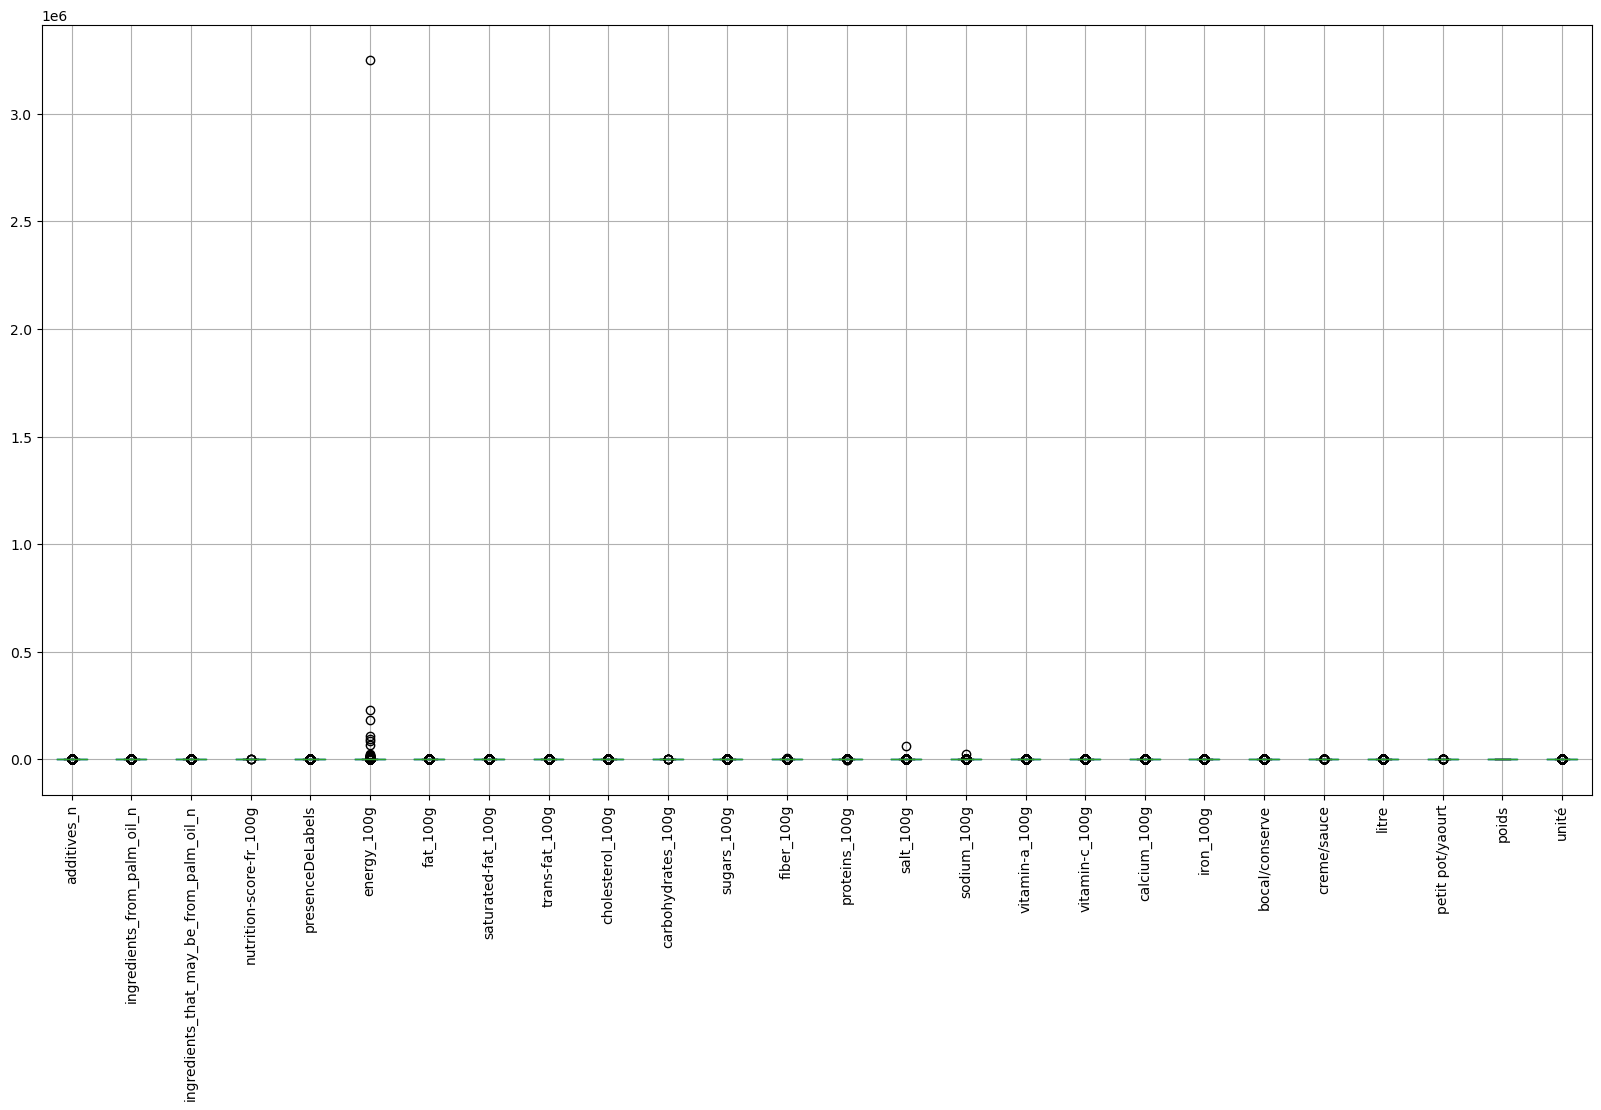

In [121]:
ttt = [colgarder[i] for i,colk in enumerate(colgarder)  if colk not in  ['nutrition_grade_fr','code', 'product_name', 'quantity', 'categories_fr','main_category_fr'] ]
openfoodfacts[ttt].boxplot(rot=90,figsize = (20,10))
del ttt;

In [133]:
openfoodfacts[openfoodfacts.energy_100g>325137.3][['nutrition_grade_fr','url','code', 'product_name', 'quantity', 'categories_fr','main_category_fr','energy_100g']]

,nutrition_grade_fr,url,code,product_name,quantity,categories_fr,main_category_fr,energy_100g
212928,b,http://world-fr.openfoodfacts.org/produit/3257983143096/pois-casses-cora,3257983143096,Pois cassés,500 g,Pois-casses,Pois-casses,3251373.0


In [122]:
openfoodfacts.energy_100g.describe()

count    3.207490e+05
mean     9.296015e+02
std      5.833946e+03
min      0.000000e+00
25%      1.200000e+02
50%      7.490000e+02
75%      1.569000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

In [137]:
openfoodfacts.energy_100g[openfoodfacts.code=='3257983143096'] = 1373

C:\Users\eleor\AppData\Local\Temp\ipykernel_23000\1912043595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openfoodfacts.energy_100g[openfoodfacts.code=='3257983143096'] = 1373


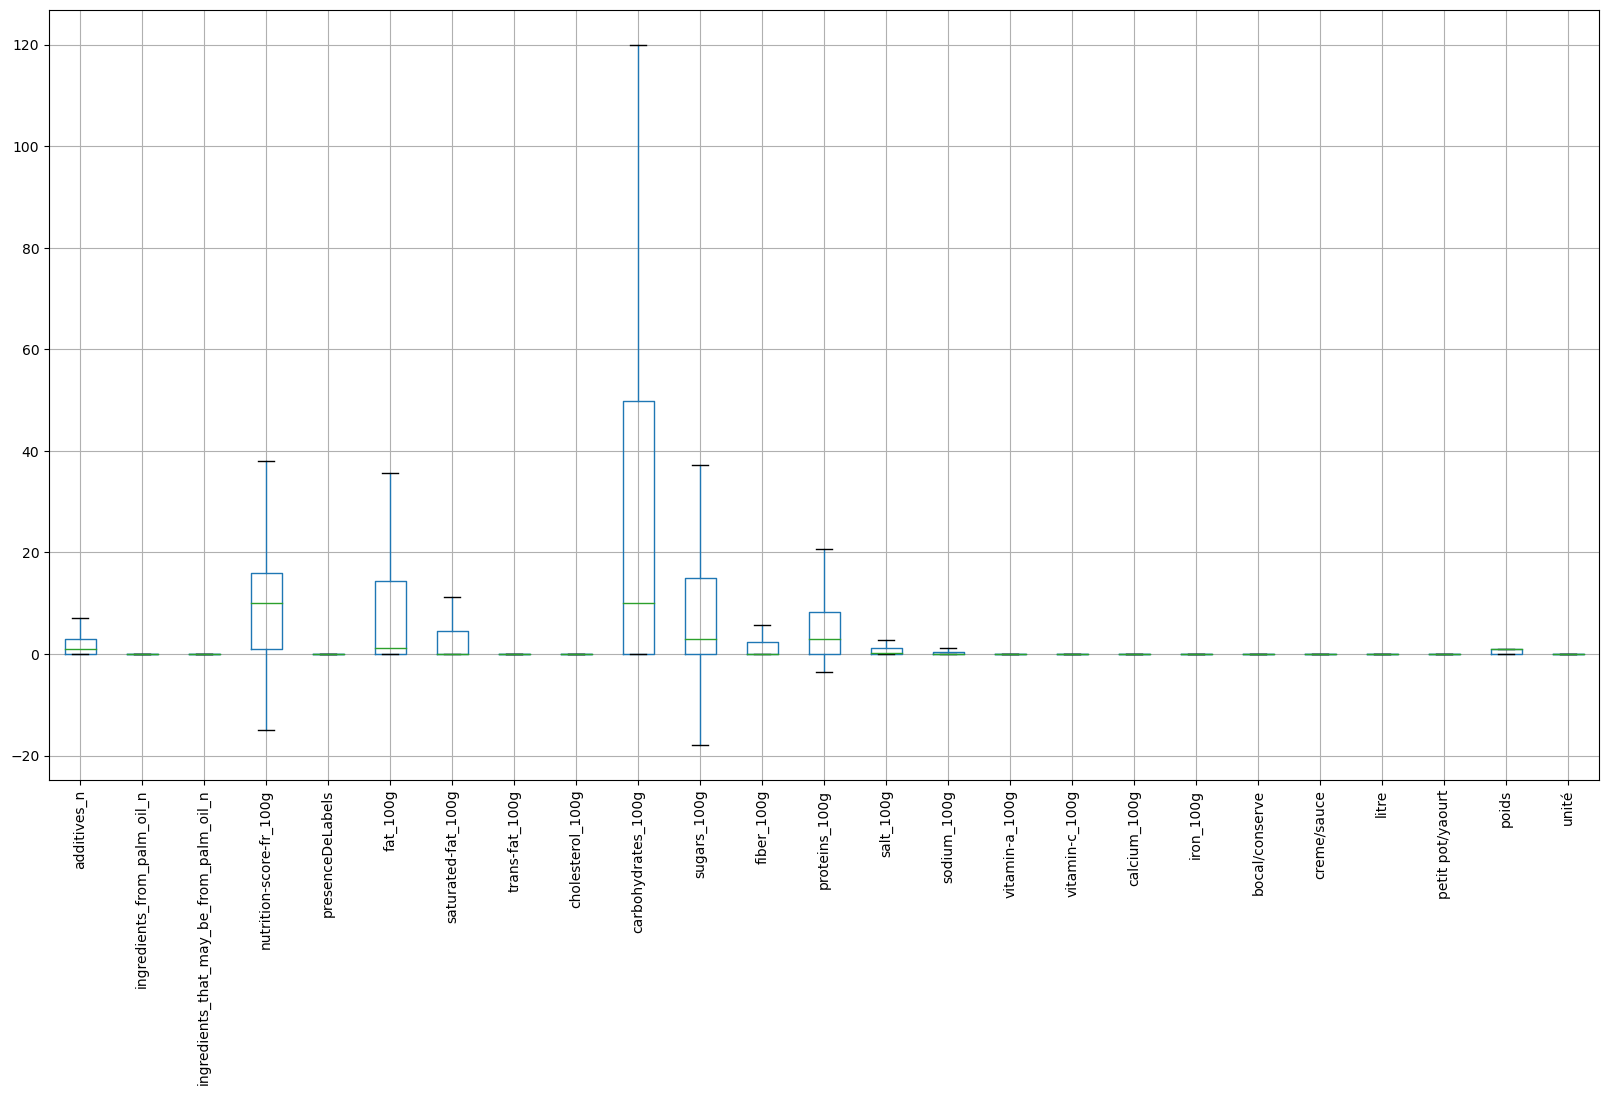

In [140]:
ttt = [colgarder[i] for i,colk in enumerate(colgarder)  if colk not in  ['energy_100g','nutrition_grade_fr','code', 'product_name', 'quantity', 'categories_fr','main_category_fr'] ]
openfoodfacts[ttt].boxplot(rot=90,figsize = (20,10),showfliers=False)
del ttt;

In [ ]:
## Autres anomalies detectées, les valeurs négatives

In [173]:
openfoodfacts[openfoodfacts.columns[openfoodfacts.columns.isin(colgarder) & openfoodfacts.columns.isin(openfoodfacts.dtypes[openfoodfacts.dtypes!=object].index.to_list())]].apply(lambda x : x<0).sum()

additives_n                                0    
ingredients_from_palm_oil_n                0    
ingredients_that_may_be_from_palm_oil_n    0    
energy_100g                                0    
fat_100g                                   0    
saturated-fat_100g                         0    
trans-fat_100g                             0    
cholesterol_100g                           0    
carbohydrates_100g                         0    
sugars_100g                                0    
fiber_100g                                 0    
proteins_100g                              0    
salt_100g                                  0    
sodium_100g                                0    
vitamin-a_100g                             0    
vitamin-c_100g                             0    
calcium_100g                               0    
iron_100g                                  0    
nutrition-score-fr_100g                    35706
presenceDeLabels                           0    
bocal/conserve      

In [171]:
for col in ['iron_100g','vitamin-c_100g','vitamin-a_100g','sugars_100g','fiber_100g' ,'proteins_100g','trans-fat_100g']:
    print(col ,'| ',openfoodfacts.loc[openfoodfacts[col]<0,'url'].values[0],' | ',openfoodfacts.loc[openfoodfacts[col]<0,col].values[0])

iron_100g |  http://world-fr.openfoodfacts.org/produit/8850649009290/lamthong-fruit-cocktail-in-syrup-new-lamthong-food-industries-co-ltd  |  -0.00026
vitamin-c_100g |  http://world-fr.openfoodfacts.org/produit/0041262272323/cheez-waffies-wise  |  -0.0021
vitamin-a_100g |  http://world-fr.openfoodfacts.org/produit/0072392312726/flavor-aid-soft-drink-mix-lemon-the-jel-sert-co  |  -0.0003396
sugars_100g |  http://world-fr.openfoodfacts.org/produit/0011213420608/grade-a-fancy-chopped-spinach-spartan  |  -1.2
fiber_100g |  http://world-fr.openfoodfacts.org/produit/0028400231053/traditional-tender-cracklins-chicharrones-baken-ets  |  -6.7
proteins_100g |  http://world-fr.openfoodfacts.org/produit/0036800416727/whole-cashews-food-club  |  -3.57
trans-fat_100g |  http://world-fr.openfoodfacts.org/produit/0028190008477/xtra-butter-microwave-pop-corn-butter-jolly-time  |  -3.03


In [172]:
for col in ['iron_100g','vitamin-c_100g','vitamin-a_100g','sugars_100g','fiber_100g' ,'proteins_100g','trans-fat_100g']:
    openfoodfacts[col][openfoodfacts[col]<0]=np.nan

C:\Users\eleor\AppData\Local\Temp\ipykernel_23000\1006665702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openfoodfacts[col][openfoodfacts[col]<0]=np.nan
C:\Users\eleor\AppData\Local\Temp\ipykernel_23000\1006665702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openfoodfacts[col][openfoodfacts[col]<0]=np.nan
C:\Users\eleor\AppData\Local\Temp\ipykernel_23000\1006665702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open

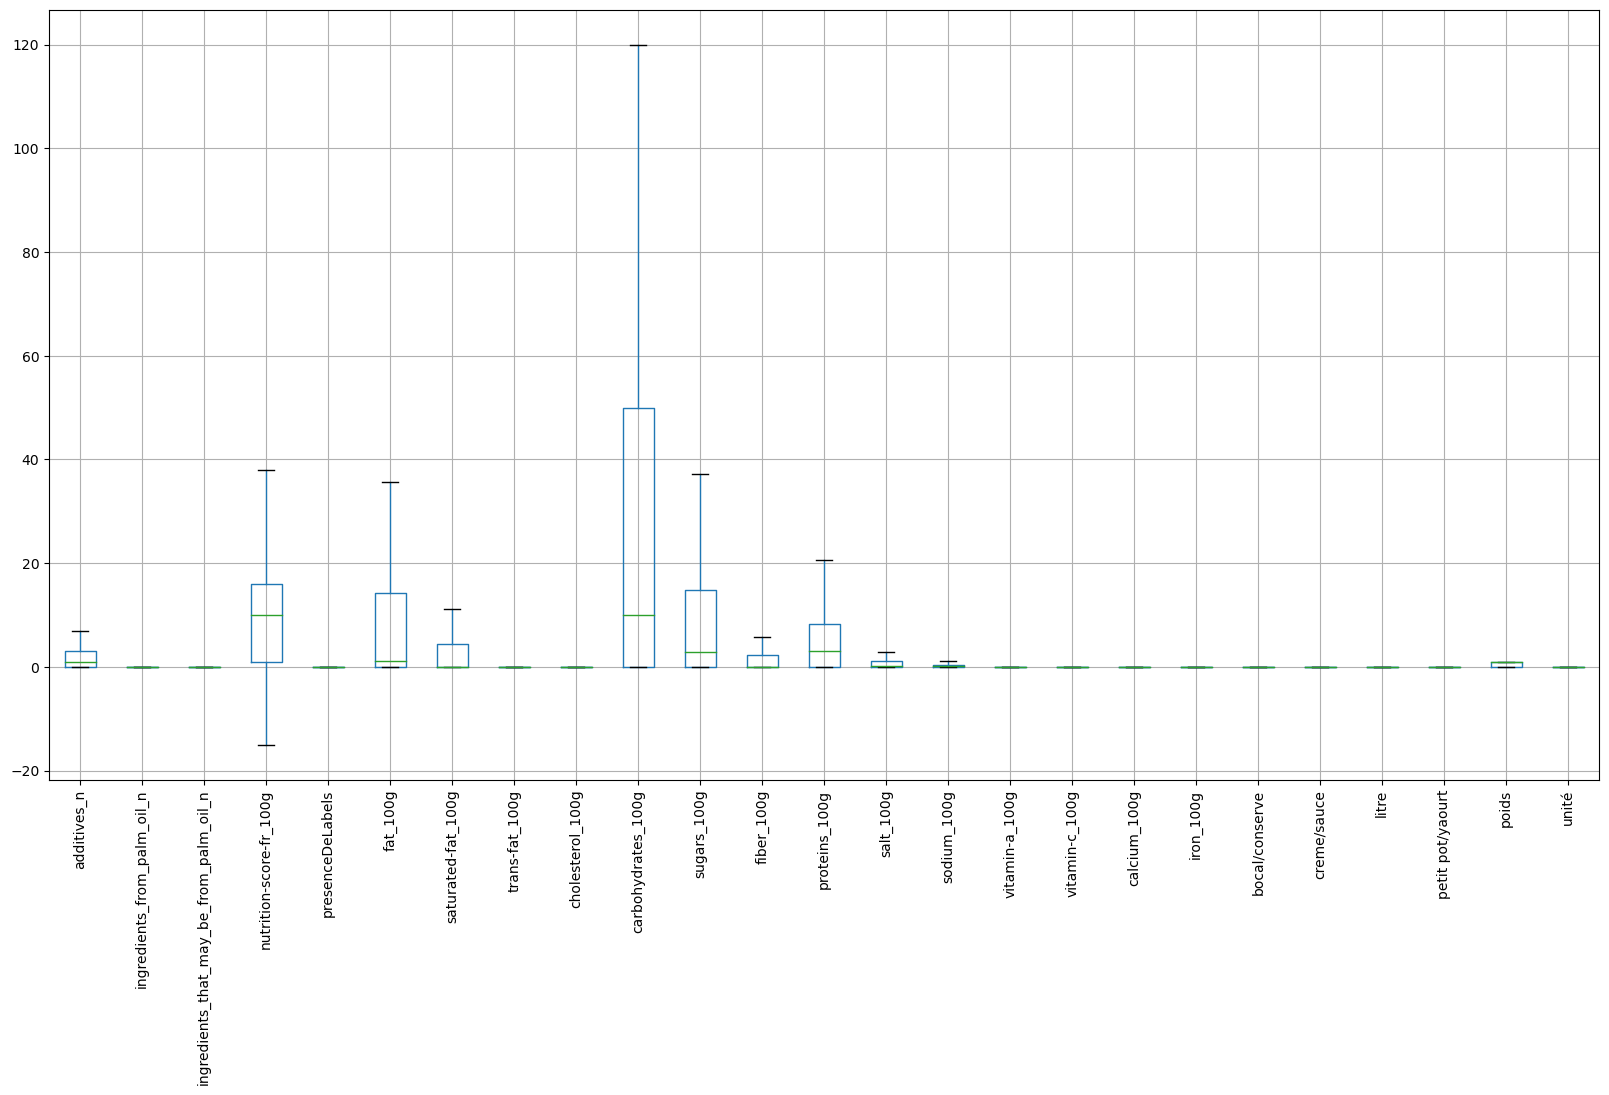

In [174]:
ttt = [colgarder[i] for i,colk in enumerate(colgarder)  if colk not in  ['energy_100g','nutrition_grade_fr','code', 'product_name', 'quantity', 'categories_fr','main_category_fr'] ]
openfoodfacts[ttt].boxplot(rot=90,figsize = (20,10),showfliers=False)
del ttt;

In [175]:
openfoodfacts.unites_abb

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,presenceDeLabels,unites_abb,unites,bocal/conserve,creme/sauce,litre,petit pot/yaourt,poids,unité
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emball

In [ ]:
# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(openfoodfacts[nutrition_facts[1]]))
print(z)

threshold = 3
 
# Position of the outlier
#print(np.where(z > 3))

openfoodfacts[nutrition_facts[1]][525]

#print(len(np.where(z > 3)))

In [ ]:

for i in nutrition_facts[:10]:
    openfoodfacts[[i]+['nutrition_grade_fr']].boxplot(by='nutrition_grade_fr', 
                                                                       column=i, 
                                                                       grid=False)

In [ ]:
#Ci dessous la liste des colonnes que l'on garde

In [ ]:
pd.options.display.max_rows=80
pd.DataFrame(openfoodfacts[openfoodfacts.columns[~openfoodfacts.columns.isin(nomColonnes.Colonnes[nomColonnes.type_de_colonne=='nutrition_facts'])]].notna().sum()/nbLigne)\
.style.background_gradient(cmap='Blues').format("{:.2%}")

## Creation dataframe etude

In [176]:
df_openfoodfacts = openfoodfacts[colgarder]

if not os.path.exists('df_openfoodfacts.csv'):
    df_openfoodfacts.to_csv('df_openfoodfacts.csv',sep='\t',encoding='utf-8',index=False)

In [ ]:
pd.set_option('max_colwidth', -1)

In [ ]:
openfoodfacts.loc[openfoodfacts.quantity.isna() & openfoodfacts.serving_size.notna()][['product_name','url','quantity','categories_fr','serving_size','additives_n','main_category_fr']]\
.sample(5)

In [ ]:
pd.DataFrame({'quantservcomp':[quant if not quant is np.nan else serv for quant,serv in zip(openfoodfacts.quantity,openfoodfacts.serving_size) ]}).isna().sum()/nbLigne

In [ ]:
openfoodfacts.ingredients_text.sample(5).str.split(',', expand=True)

In [ ]:
openfoodfacts[["main_category_fr",'categories_fr']].describe()

In [ ]:
#supprimer element entre parenthèse
(?<!m)

In [ ]:
openfoodfacts.ingredients_text[297693]

In [ ]:
openfoodfacts.ingredients_text.str.lower().replace('\\(   .+   (  ?<!\\(  )  \\)','',regex=True)[297693]

In [ ]:
openfoodfacts.ingredients_text.str\
.lower().str\
.replace('\\([^(]+\\)','',regex=True).str\
.split(',', expand=True).iloc[:,0].str\
.replace('organic','').str\
.replace('^ ','').describe()


In [ ]:
pd.options.display.max_rows=60

In [ ]:
openfoodfacts.columns[~openfoodfacts.columns.isin(nutrition_facts)].to_list()

In [ ]:
msno.matrix(df_openfoodfacts[df_openfoodfacts.columns[~df_openfoodfacts.columns.isin(nutrition_facts)].to_list()])

In [ ]:
msno.heatmap(df_openfoodfacts[['quantity','serving_size']])

</br>

</br>

</br>

### Supprimer les colonnes qui possèdent beaucoups de valeurs non nulles

In [ ]:
# Le % de valeurs manquantes et les colonnes à conserver
nomColonnes["%Na"] = nomColonnes['Nombre NA']/nbLigne
nomColonnes["NoNa"] = (nbLigne - nomColonnes['Nombre NA'])
nomColonnes["colASupp"] = nomColonnes.Colonnes.isin(col_to_drop)

In [ ]:
nomColonnes.colASupp[nomColonnes['Nombre NA'] > (nbLigne * 0.95)] = True

In [ ]:
for x in nomColonnes.Colonnes[(nomColonnes.type_de_colonne=='nutrition_facts') & (nomColonnes.colASupp == True)]:
    nutrition_facts.remove(x)

In [ ]:
for nut in nutrition_facts:
    if nut in nomColonnes.Colonnes[(nomColonnes.type_de_colonne=='nutrition_facts') & (nomColonnes.colASupp == False)]:
        colgarder += [nut]

In [ ]:
nomColonnes[nomColonnes.colASupp==False].groupby(['type_de_colonne'])['%Na'].describe().T

In [ ]:
fig,axes = plt.subplots(nrows = 7,ncols = 1,figsize=(20,40))
for i,typcol in enumerate( nomColonnes.type_de_colonne.unique() ):
    sns.barplot(data = nomColonnes[nomColonnes.type_de_colonne==typcol], x = 'Colonnes' , y = '%Na',ax=axes[i])
    axes[i].title.set_text(typcol)
    axes[i]
    if len(nomColonnes.Colonnes[nomColonnes.type_de_colonne==typcol])>10:
        axes[i].tick_params(axis='x', rotation=60, labelsize=7)


In [ ]:
fig,axes = plt.subplots(nrows = 7,ncols = 1,figsize=(20,40))
for i,typcol in enumerate( nomColonnes.type_de_colonne.unique() ):
    sns.barplot(data = nomColonnes[nomColonnes.type_de_colonne==typcol], x = 'Colonnes' , y = '%Na',ax=axes[i])
    axes[i].title.set_text(typcol)
    axes[i]
    if len(nomColonnes.Colonnes[nomColonnes.type_de_colonne==typcol])>10:
        axes[i].tick_params(axis='x', rotation=60, labelsize=7)


In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=pd.cut(x=nomColonnes['%Na'], bins=20).value_counts().index ,y = pd.cut(x=nomColonnes['%Na'], bins=20).value_counts())
plt.title('Répartition du nombre de valeurs manquantes')
plt.xticks(rotation = 90);

In [ ]:
[
 nomColonnes.colASupp[:50].sum(),
 nomColonnes.colASupp[50:100].sum(),
 nomColonnes.colASupp[100:130].sum(),
 nomColonnes.colASupp[130:162].sum()
]#32 24 5

In [ ]:
general_information + ingredients + misc_data + score_foot_print + tags + labels + nutrition_facts

In [ ]:
openfoodfacts[['ingredients_text']].iloc[198025].str.replace('\(.*\)','',regex=True)

In [ ]:
"eerr"